# Visualización

# Importamos librerías

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# Cargamos datos

In [2]:
titanic = pd.read_csv('datasets/titanic.csv')
penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

In [3]:
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
328,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,Female
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,Female
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,Female
226,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,Female
305,Gentoo,Biscoe,50.8,17.3,228.0,5600.0,Male


In [4]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
81,16.66,3.4,Male,No,Thur,Lunch,2


In [5]:
flights.sample()

,year,month,passengers
46,1952,Nov,172


# Configuración de pantalla

In [6]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [7]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## COMPARACIÓN

- Gráfico de barras
- Gráfico de barras agrupadas
- Gráfico de líneas
- Diagrama de dispersión

### Gráfico de barras

#### seaborn: countplot
Gráfico de barras básico, donde contamos la cantidad de elementos de cada especie de pingüino

`pingüino por especie❓`

In [8]:
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
232,Gentoo,Biscoe,45.5,13.7,214.0,4650.0,Female
279,Gentoo,Biscoe,50.4,15.3,224.0,5550.0,Male


In [9]:
penguins.groupby("species").agg("count")

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


In [10]:
penguins.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
83,Adelie,Torgersen,35.1,19.4,193.0,4200.0,Male


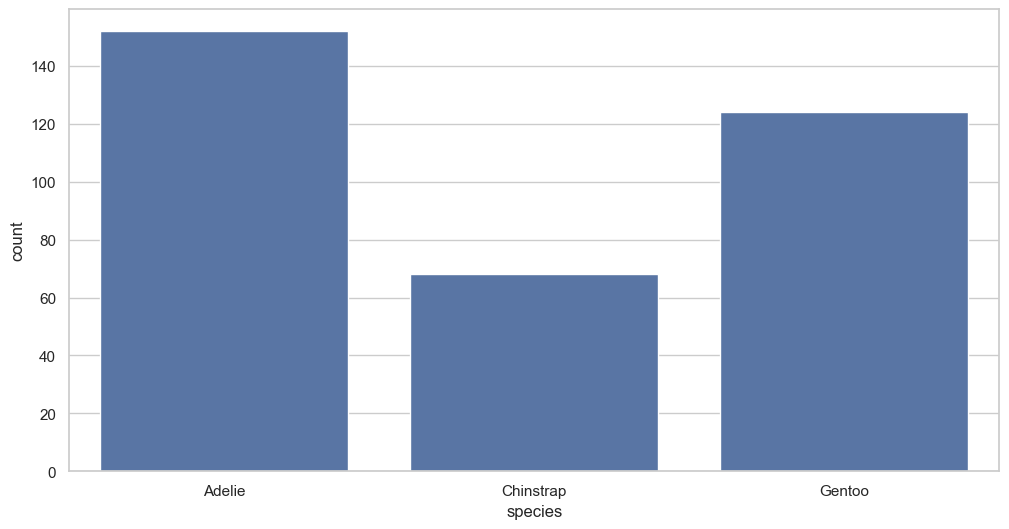

In [11]:
sns.countplot(x=penguins.species)
plt.show();

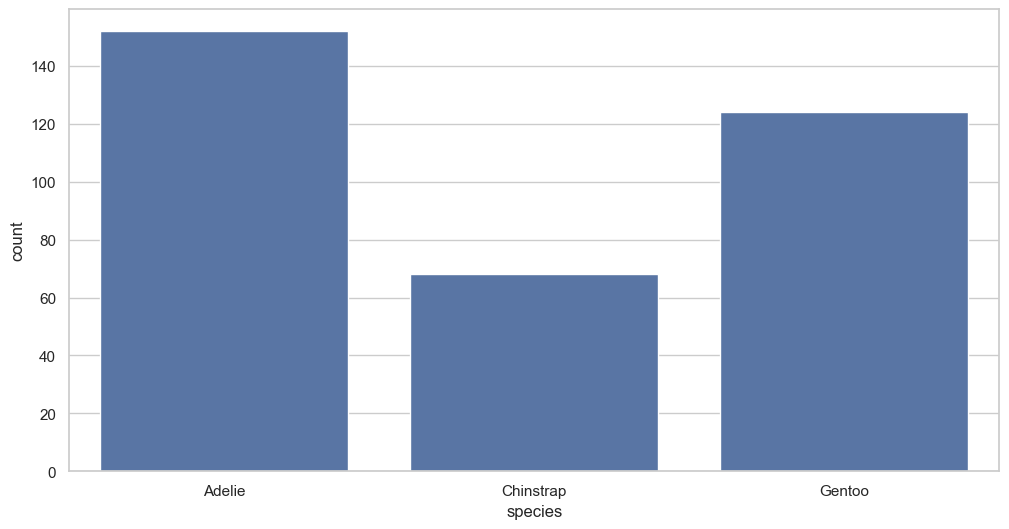

In [12]:
sns.countplot(data = penguins, x="species")
plt.show();

Podemos cambiar los colores de los gráficos usando el argumento `palette="color code"`
Consulta las paletas de Seaborn --> [Aquí](https://seaborn.pydata.org/tutorial/color_palettes.html)

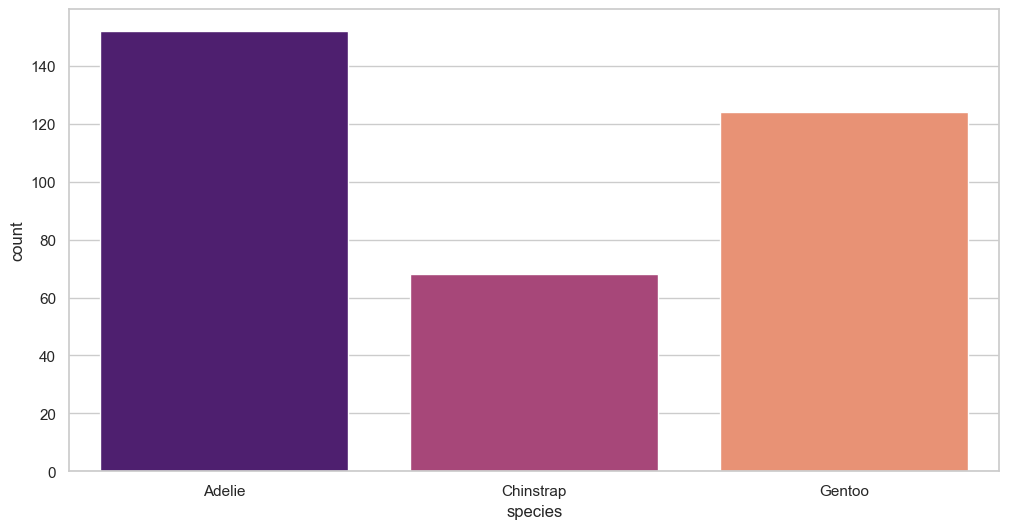

In [13]:
sns.countplot(x=penguins["species"], palette="magma")
plt.show();

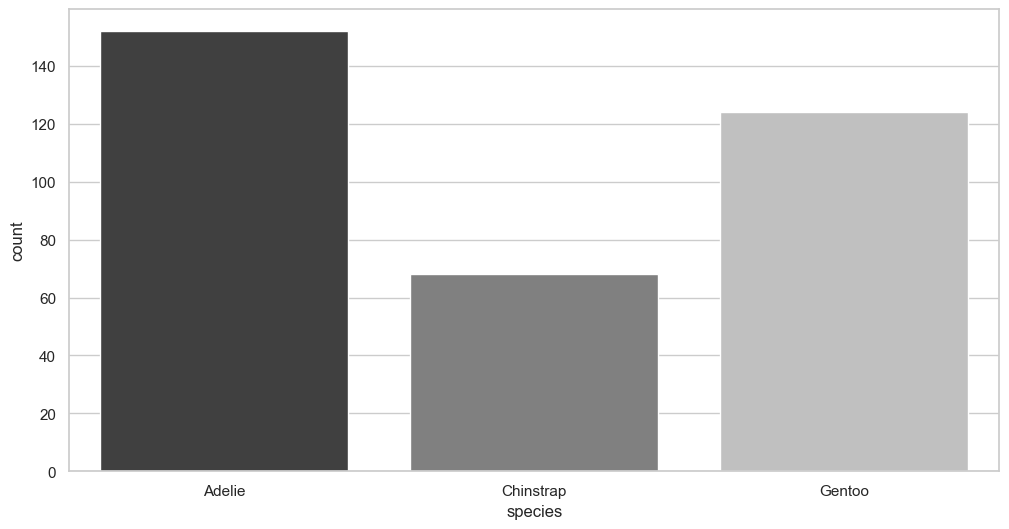

In [14]:
sns.countplot(x=penguins["species"], palette="gray")
plt.show();

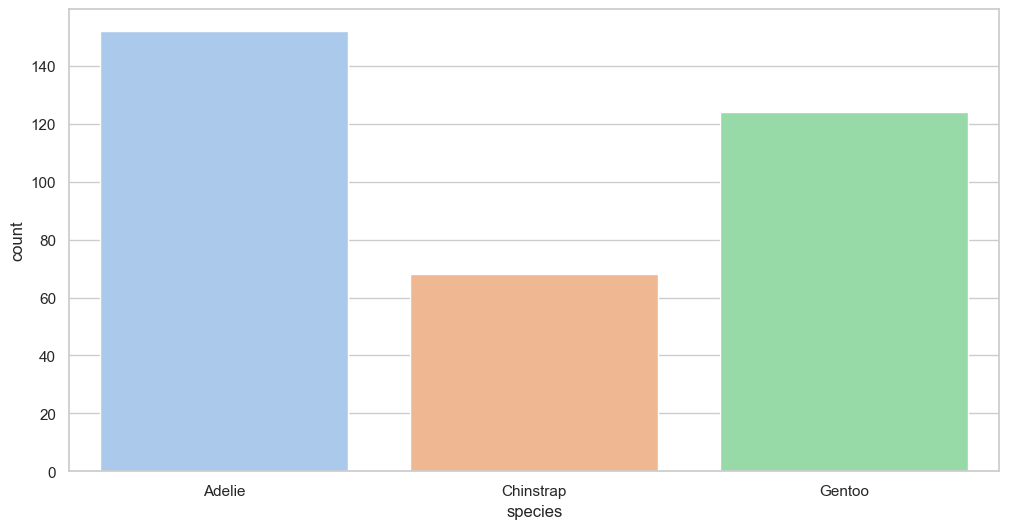

In [15]:
sns.countplot(x=penguins["species"], palette="pastel")
plt.show();

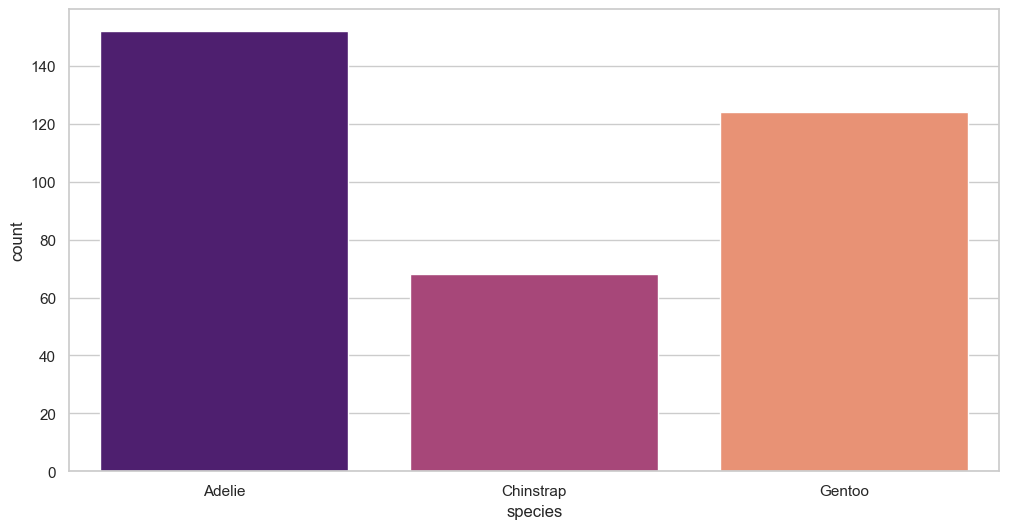

In [16]:
sns.countplot(data=penguins, x="species", palette="magma")
plt.show();

#### seaborn: diagrama de barras

El diagrama de barras de Seaborn, que no debe confundirse con el gráfico de conteo, traza una estimación de la tendencia central de una variable numérica con la altura de cada rectángulo y proporciona cierta indicación de la incertidumbre en torno a esa estimación mediante barras de error.
`ci="sd"` para cambiar el intervalo de confianza a la desviación estándar

`promedio de pasajeros por año❓`

In [17]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [18]:
flights.groupby("year").agg({"passengers":"mean"})["passengers"].round(3)

year
1949    126.667
1950    139.667
1951    170.167
1952    197.000
1953    225.000
1954    238.917
1955    284.000
1956    328.250
1957    368.417
1958    381.000
1959    428.333
1960    476.167
Name: passengers, dtype: float64

In [19]:
flights.groupby("year")["passengers"].mean().round(3)

year
1949    126.667
1950    139.667
1951    170.167
1952    197.000
1953    225.000
1954    238.917
1955    284.000
1956    328.250
1957    368.417
1958    381.000
1959    428.333
1960    476.167
Name: passengers, dtype: float64

[diagrama de barras de Seaborn](https://seaborn.pydata.org/generated/seaborn.barplot.html)

In [20]:
# Doing the avg by year: mean by default
barplot = sns.barplot(x="year", y="passengers", data=flights, errorbar=None)

# countplot
# barplot: mean

`Total de pasajeros por año❓`

In [21]:
sns.barplot(x=flights["year"], y=flights["passengers"], palette="magma", estimator=sum, errorbar=None);

Eche un vistazo al gráfico de barras de Seaborn --> https://seaborn.pydata.org/generated/seaborn.barplot.html

¿Cuándo utilizar uno u otro? Realmente podemos hacer lo mismo con ambos, Matplotlib es tremendamente potente y Seaborn está desarrollado sobre Matplotlib pero es sintácticamente más simple y visualmente un poco más moderno.

#### matplotlib: barplot
El mismo gráfico de conteo que hemos hecho en seaborn se llama "gráfico de barras" en matplotlib. Es un gráfico de barras.
Solo tienes que agrupar el marco de datos y agregar `.plot`

`pingüinos por especie❓`

In [22]:
penguins["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

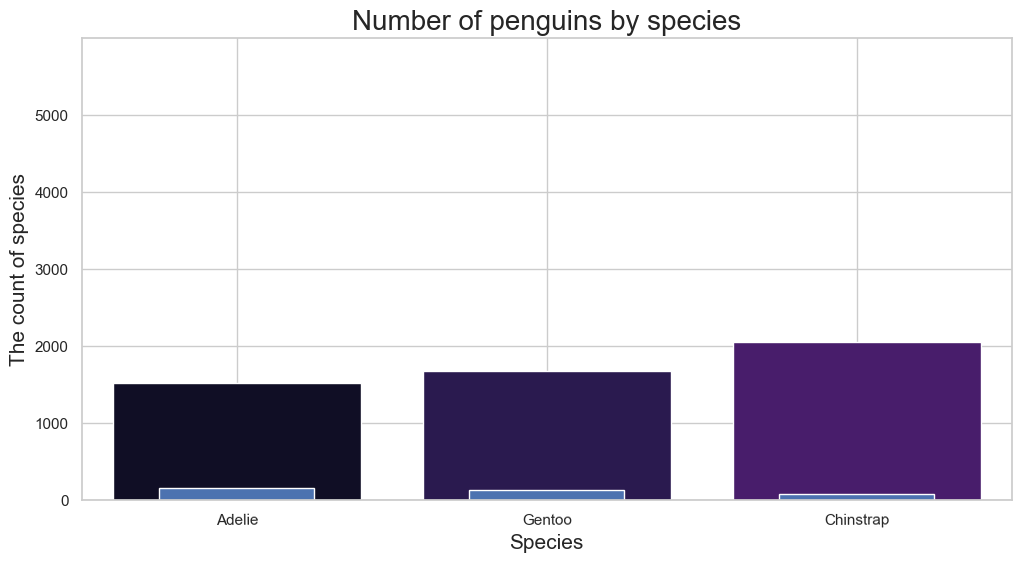

In [23]:
penguins["species"].value_counts().plot(kind="bar")
plt.xticks(rotation=0.5)
plt.title(label = "Number of penguins by species" ,size=20)
plt.xlabel("Species", size=15)
plt.ylabel("The count of species", size=15)
plt.show();

In [24]:
# colors: https://matplotlib.org/stable/gallery/color/named_colors.html

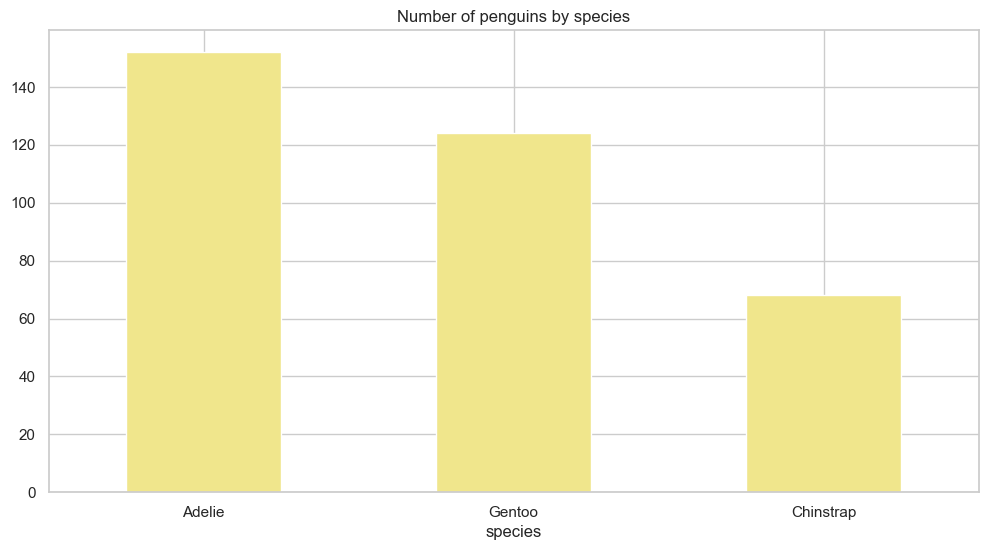

In [25]:
penguins["species"].value_counts().plot(kind="bar", color="khaki", title="Number of penguins by species")
plt.xticks(rotation=0)
plt.show();

### Columna: gráfico de barras agrupadas

Podemos crear gráficos de barras agrupadas y así agregar una dimensión extra al gráfico mediante el uso del parámetro hue, que hace que cada barra se multiplique por el número de valores distintos de la variable indicada por este argumento.

`¿Cuántas personas sobrevivieron/no sobrevivieron por clase❓`

In [26]:
# we can add plt. things from matplotlib into seaborn

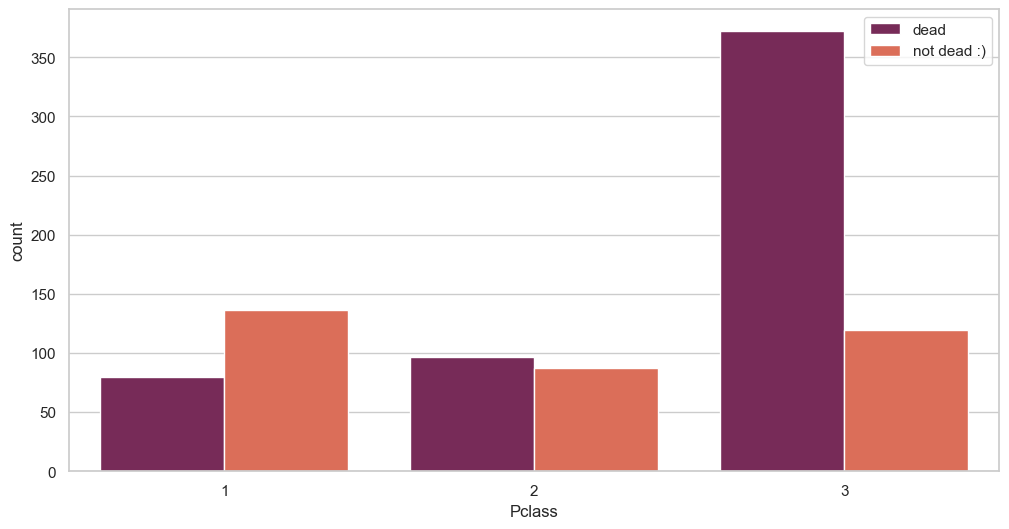

In [27]:
#People surviving per class

sns.countplot(x=titanic["Pclass"], hue=titanic["Survived"], palette="rocket")
plt.legend(labels = ['dead', 'not dead :)'])
plt.show();

In [28]:
titanic.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
773,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,NaN,C


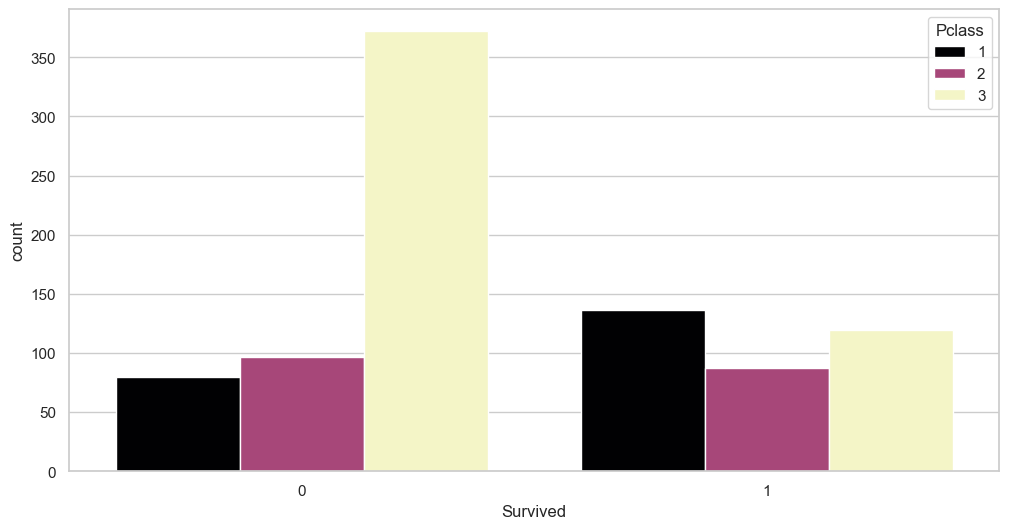

In [29]:
#People surviving per class

sns.countplot(x=titanic["Survived"], hue=titanic["Pclass"], palette="magma")
plt.show();

`Cuántos pingüinos son machos/hembras por especie?`

In [30]:
penguins.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
280,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,Female


#### nacido en el mar: gráfico de recuento

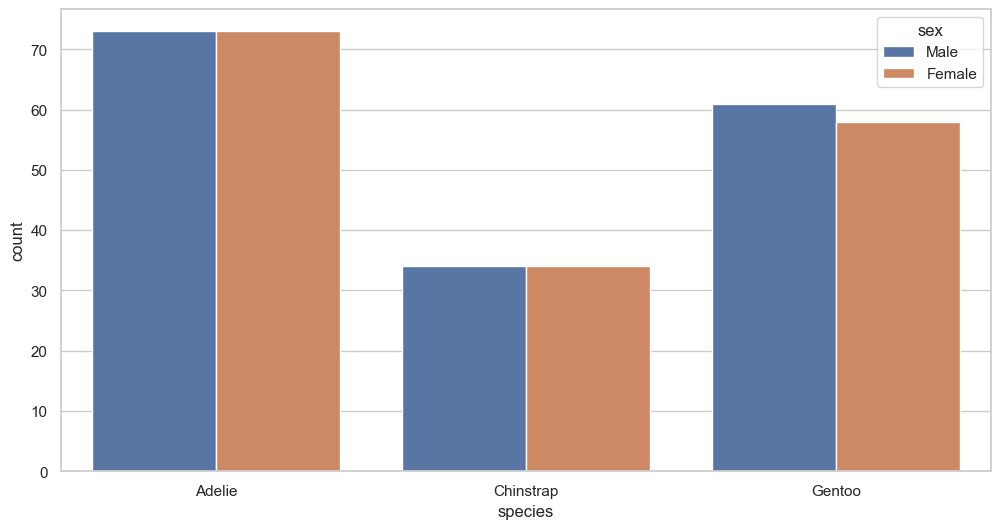

In [31]:
sns.countplot(x="species", hue="sex", data = penguins)
plt.show();

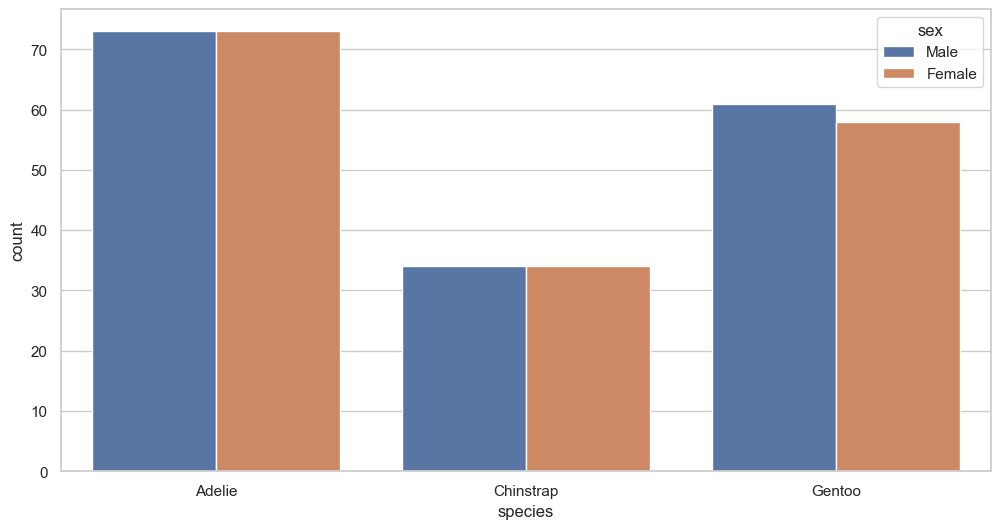

In [32]:
sns.countplot(x=penguins.species, hue=penguins.sex)
plt.show(); #Same function, different syntax

El mismo gráfico pero horizontal 🙃

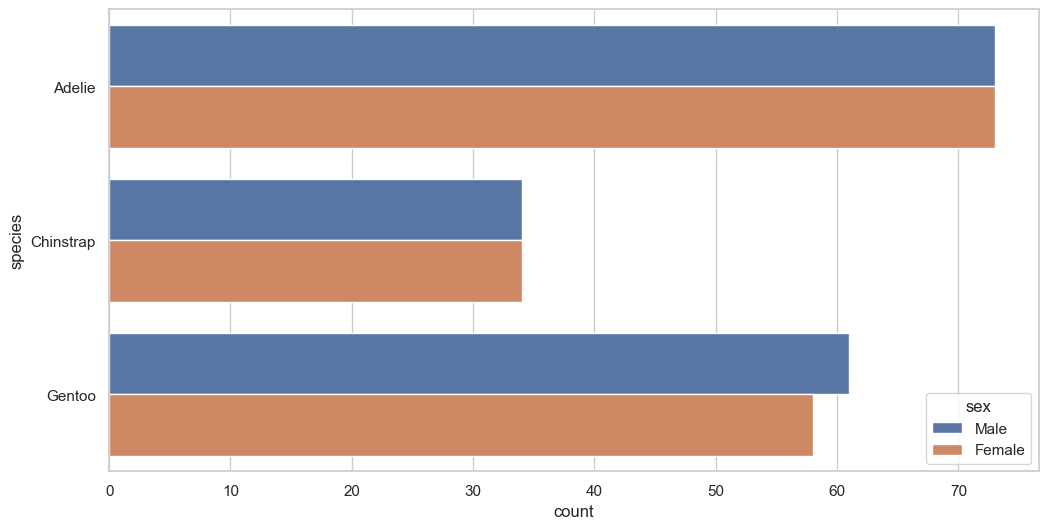

In [33]:
sns.countplot(y=penguins.species, hue=penguins.sex)
plt.show();

`¿cuántas personas son hombres/mujeres por clase❓`

Agregamos otra variable que tiene más categorías, en seaborn las barras se colorean solas 🌈

In [34]:
titanic.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
193,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0,F2,S


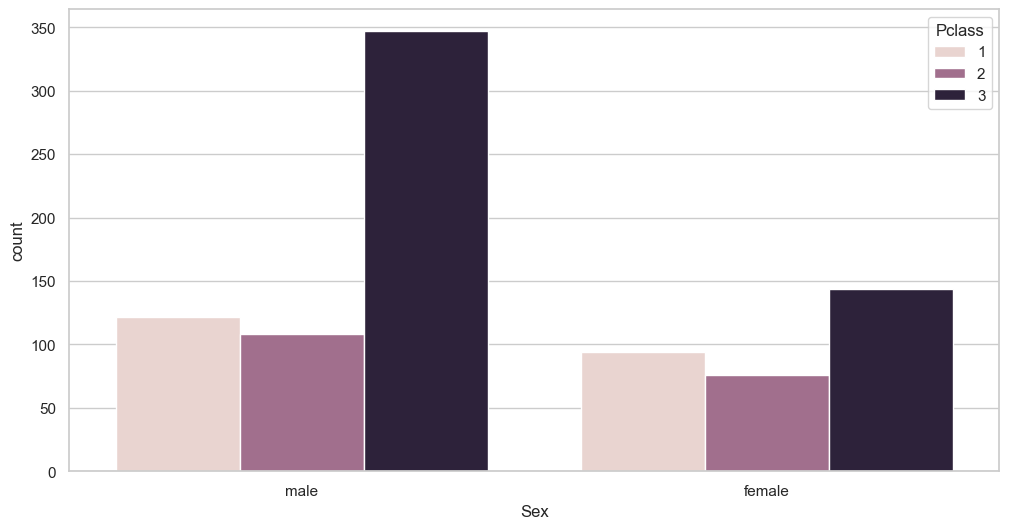

In [35]:
sns.countplot(hue="Pclass", data = titanic, x="Sex" )
plt.show(); # order of the arguements don't matter when using name of variable

### matplotlib: gráfico de barras

`¿Cuántos pingüinos son machos/hembras por especie?`

Vamos a intentar, por partes, conseguir el mismo gráfico que tenemos arriba, en el que contamos los pingüinos por especie y sexo.

Primero tenemos que agrupar los datos:

In [36]:
penguins[["species", "sex"]].sample()

,species,sex
247,Gentoo,Male


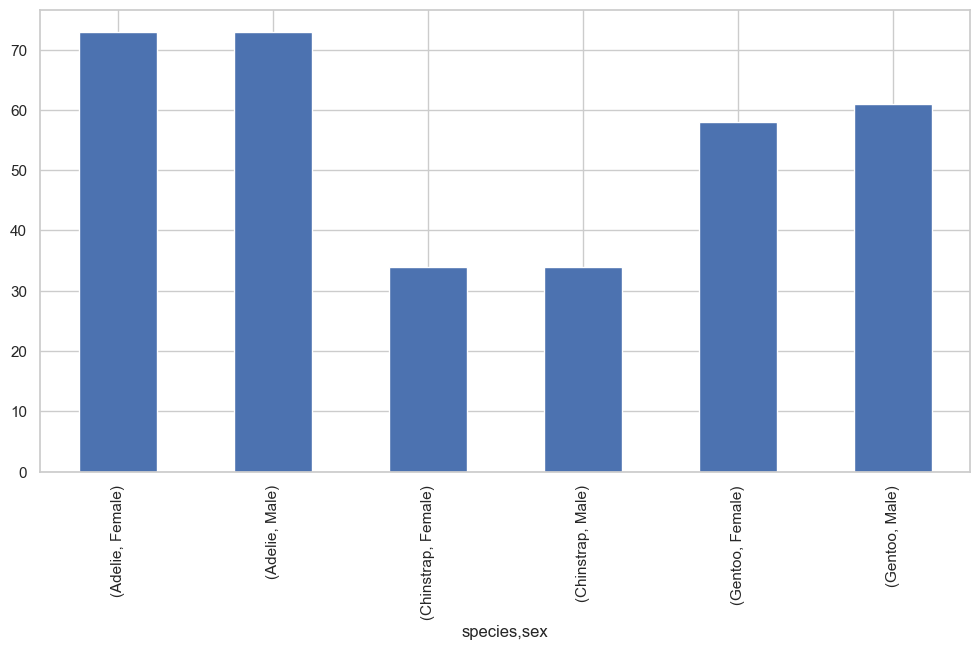

In [37]:
penguins.groupby(["species", "sex"])["sex"].count().plot(kind="bar")
plt.show();

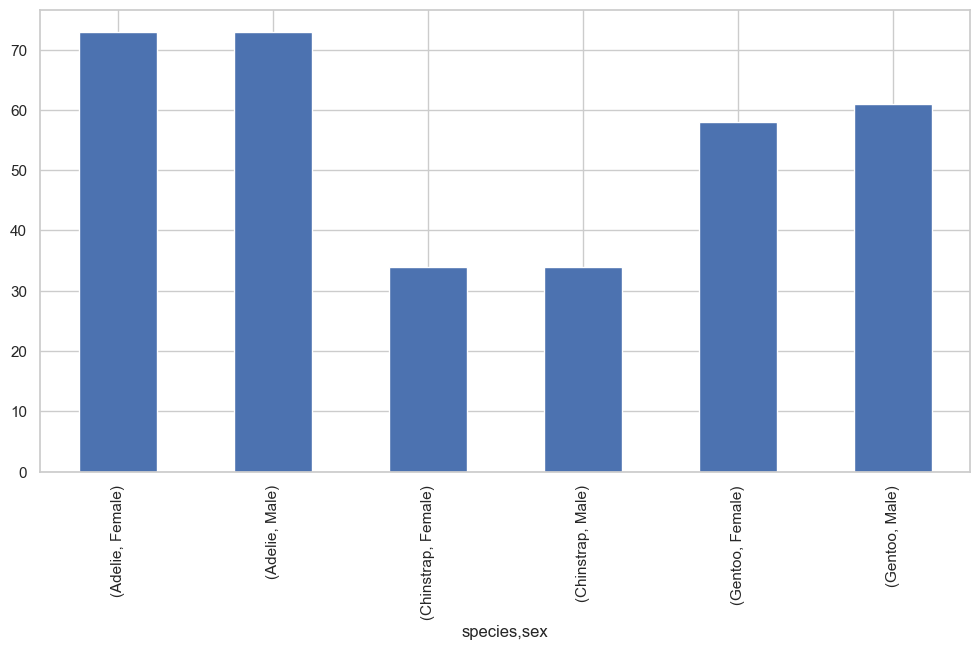

In [38]:
penguins.groupby(["species", "sex"])["sex"].count().plot(kind="bar")
plt.show();

In [39]:
penguins[["species", "sex"]]

,species,sex
0,Adelie,Male
1,Adelie,Female
2,Adelie,Female
3,Adelie,NaN
4,Adelie,Female
...,...,...
339,Gentoo,NaN
340,Gentoo,Female
341,Gentoo,Male
342,Gentoo,Female


In [40]:
penguins.groupby(["species", "sex"])["sex"].count()

species    sex   
Adelie     Female    73
           Male      73
Chinstrap  Female    34
           Male      34
Gentoo     Female    58
           Male      61
Name: sex, dtype: int64

Ok, no pasa nada, añadimos el parámetro color.
Lista de colores en matplotlib --> https://matplotlib.org/stable/gallery/color/named_colors.html

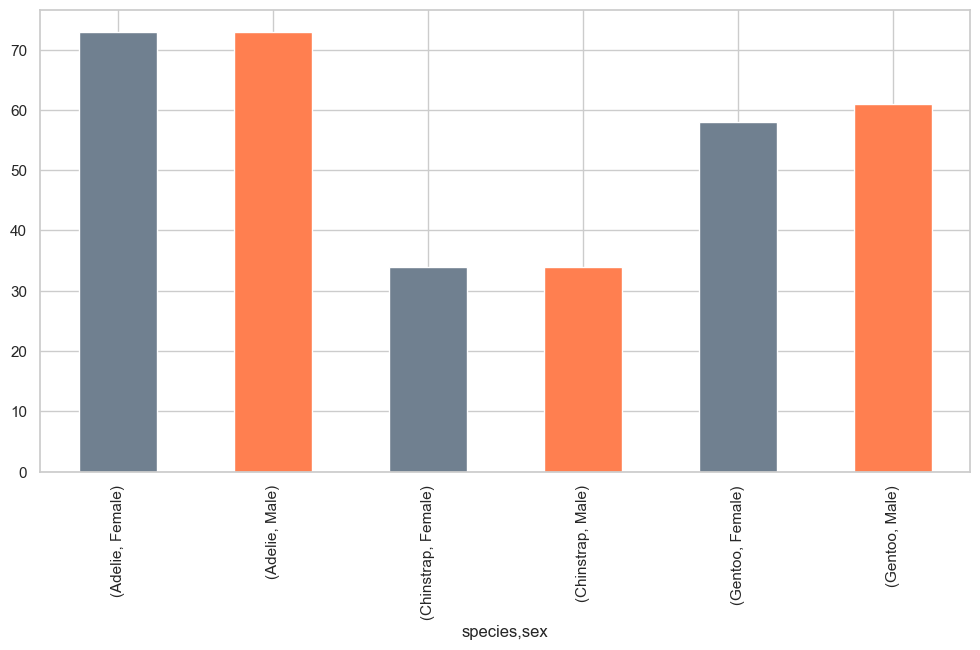

In [41]:
penguins.groupby(["species", "sex"])["sex"].count().plot(kind="bar", color=["slategray","coral"])
plt.show();

Por favor, barras, ¿se pueden juntar? Ok, tenemos que hacer un... [unstack()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) con los índices, ya que tenemos [multiindex]( https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

![apilar y desapilar](https://miro.medium.com/max/1400/1*DYDOif_qBEgtWfFKUDSf0Q.png)

In [42]:
pd.DataFrame(penguins.groupby(["species", "sex"])["sex"].count())

sex
species   sex        
Adelie    Female   73
          Male     73
Chinstrap Female   34
          Male     34
Gentoo    Female   58
          Male     61

In [43]:
hola2 = pd.DataFrame(penguins.groupby(["species", "sex"])["sex"].count())
hola2

sex
species   sex        
Adelie    Female   73
          Male     73
Chinstrap Female   34
          Male     34
Gentoo    Female   58
          Male     61

In [44]:
hola2 = pd.DataFrame(penguins.groupby(["species", "sex"])["sex"].count()).unstack()
hola2

sex     
sex       Female Male
species              
Adelie        73   73
Chinstrap     34   34
Gentoo        58   61

In [45]:
# unstacking after doing groupby will allow us to group only one thing, instead of the two

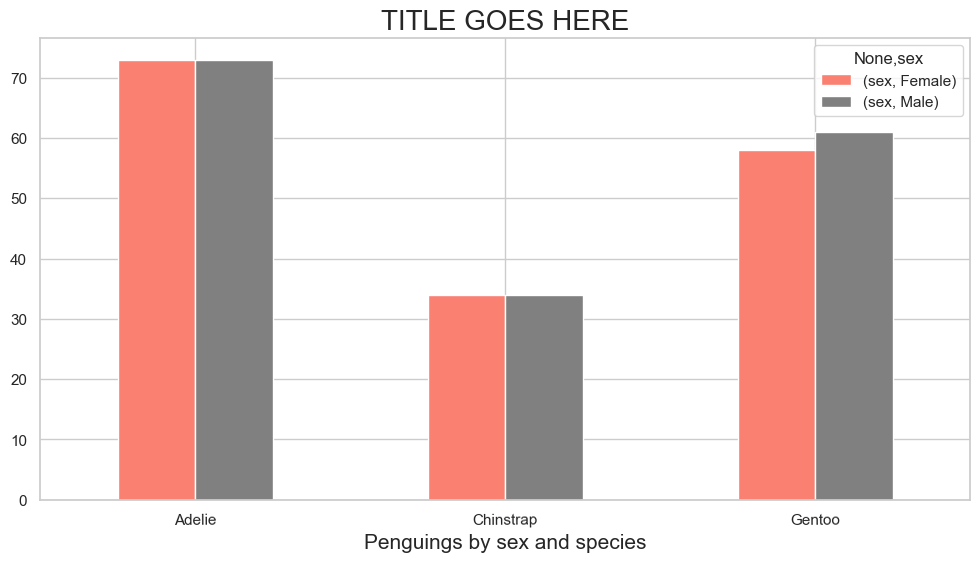

In [46]:
def grouped_bar_chart():
    hola2.plot(kind="bar", color=["salmon", "gray"])
    plt.xticks(rotation=0.5)
    plt.xlabel(xlabel = "Penguings by sex and species", size=15)
    plt.title("TITLE GOES HERE", size = 20)
    plt.show();
    
    
grouped_bar_chart()

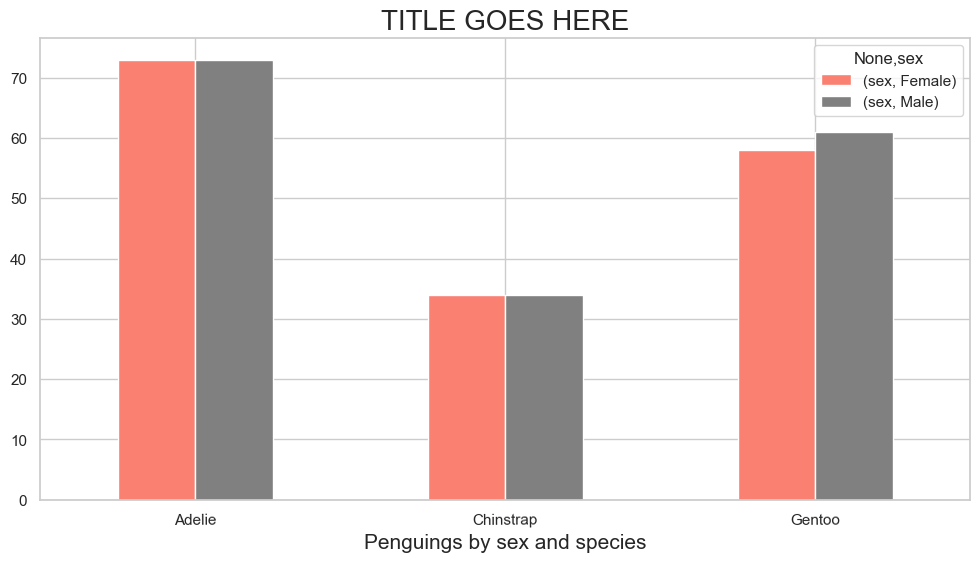

In [47]:
grouped_bar_chart()

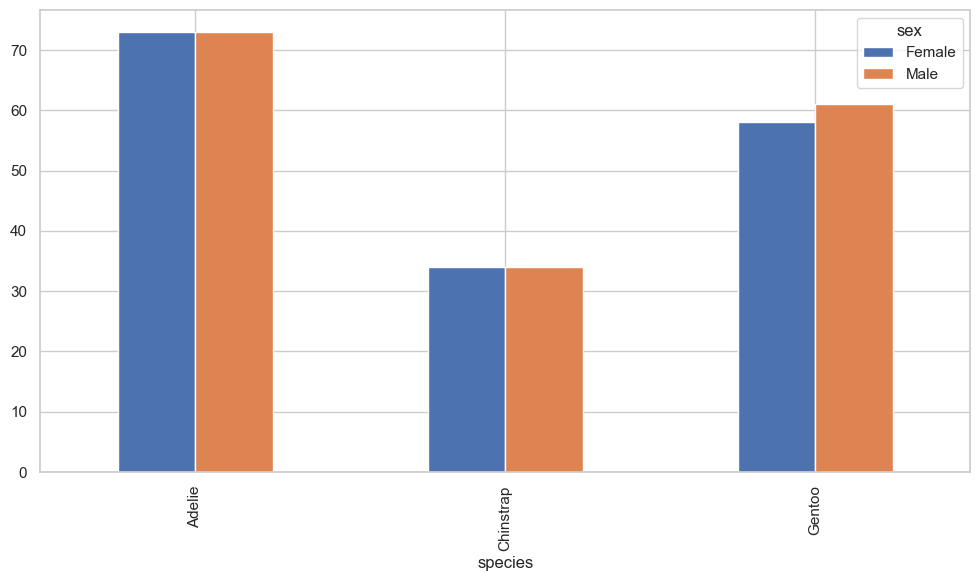

In [48]:
save = penguins.groupby(["species", "sex"])["sex"].count().unstack().plot(kind="bar")
plt.show();

Le damos la vuelta

In [49]:
#penguins.groupby(["species", "sex"])["sex"].count().sort_values("sex")

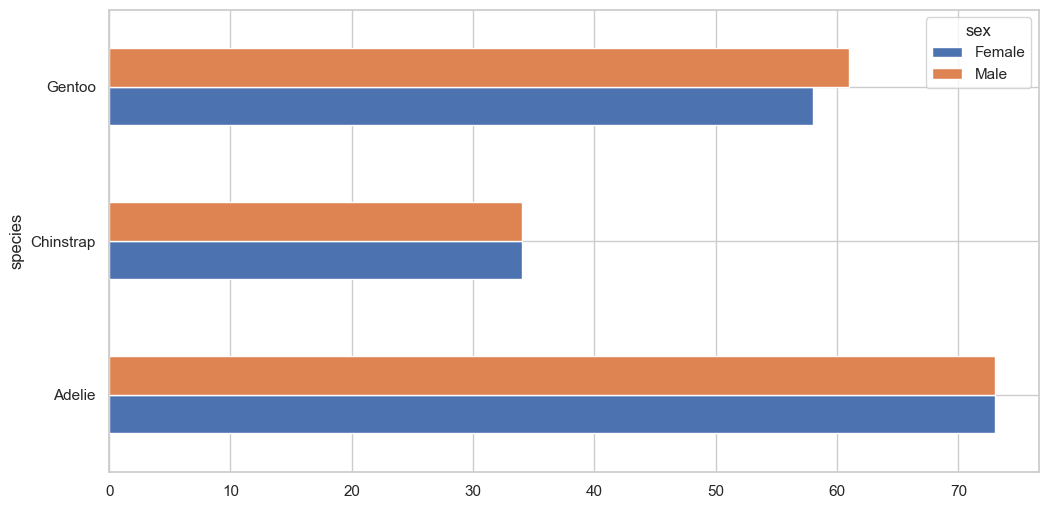

In [50]:
save = penguins.groupby(["species", "sex"])["sex"].count().unstack().plot(kind="barh" )
plt.show()

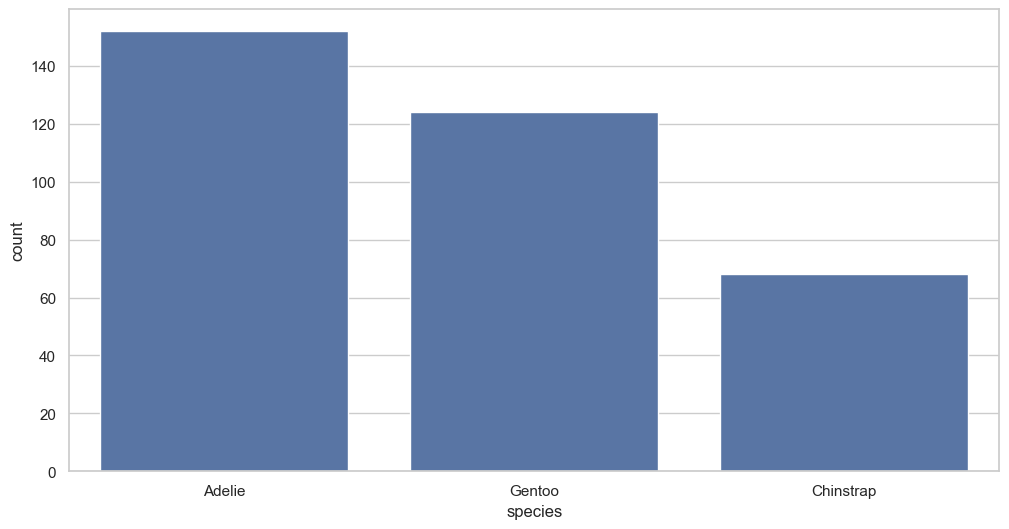

In [51]:
sns.countplot(x=penguins.species , order = penguins['species'].value_counts().index)
plt.show();

`Promedio de las tres longitudes por especie❓`

In [52]:
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
323,Gentoo,Biscoe,49.1,15.0,228.0,5500.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male
327,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,Male
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female


Os dejo un recordatorio del .agg con su [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)

In [53]:
flaps = penguins.groupby(["species"]).agg(
    {"bill_length_mm": "mean",
     "bill_depth_mm": "mean", 
     "flipper_length_mm": "mean" })

In [54]:
flaps.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm
species,,,
Adelie,38.791391,18.346358,189.953642
Chinstrap,48.833824,18.420588,195.823529
Gentoo,47.504878,14.982114,217.186992


In [55]:
# df.plot(kind="bar")

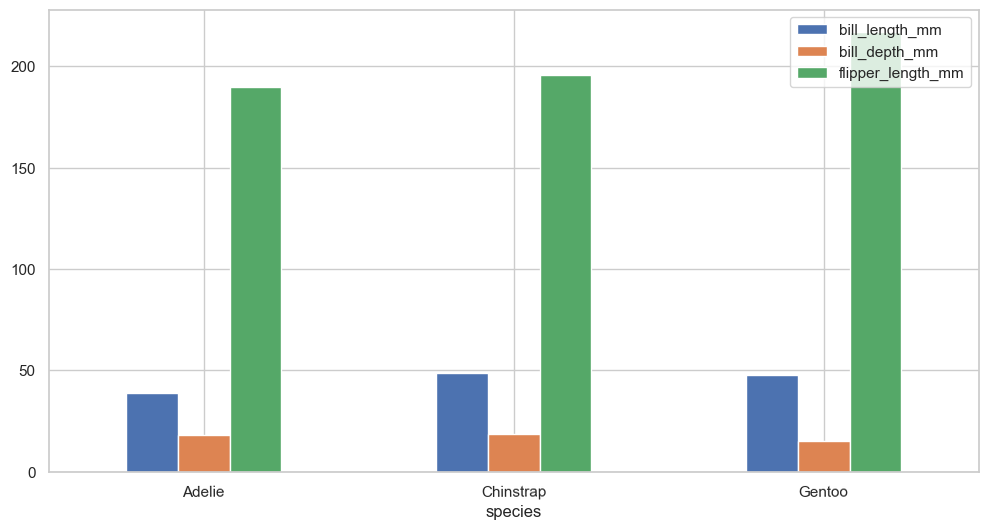

In [56]:
flaps.plot(kind="bar")
plt.xticks(rotation=0.5)
plt.show();

### Gráfico de líneas

`Evolución del total de pasajeros por año❓`

In [57]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


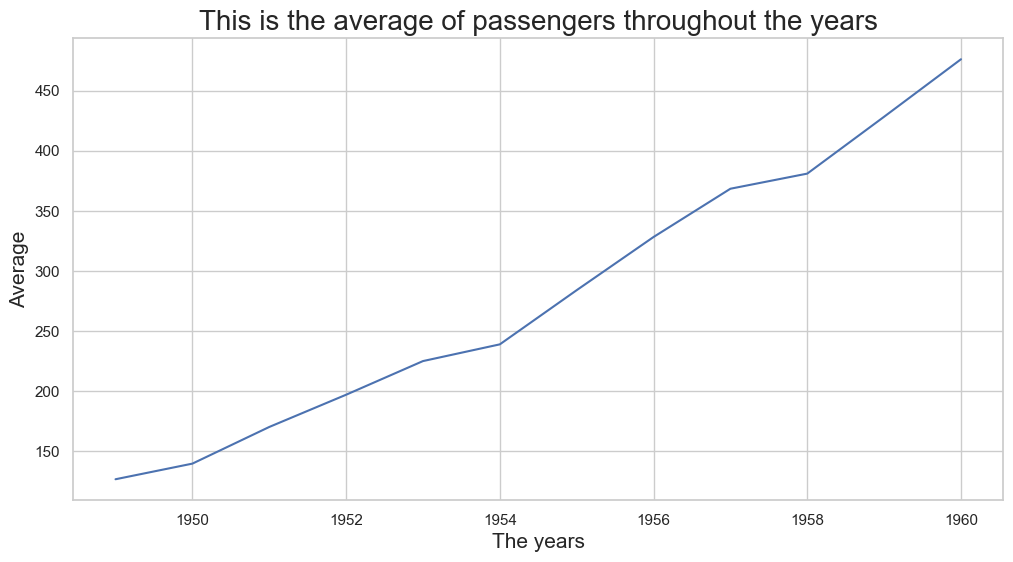

In [58]:
sns.lineplot(data=flights, x="year", y="passengers", errorbar=None); #default: avg


plt.ylabel("Average", fontsize=15);
plt.xlabel("The years", fontsize=15);
plt.title("This is the average of passengers throughout the years", fontsize = 20);
plt.show();

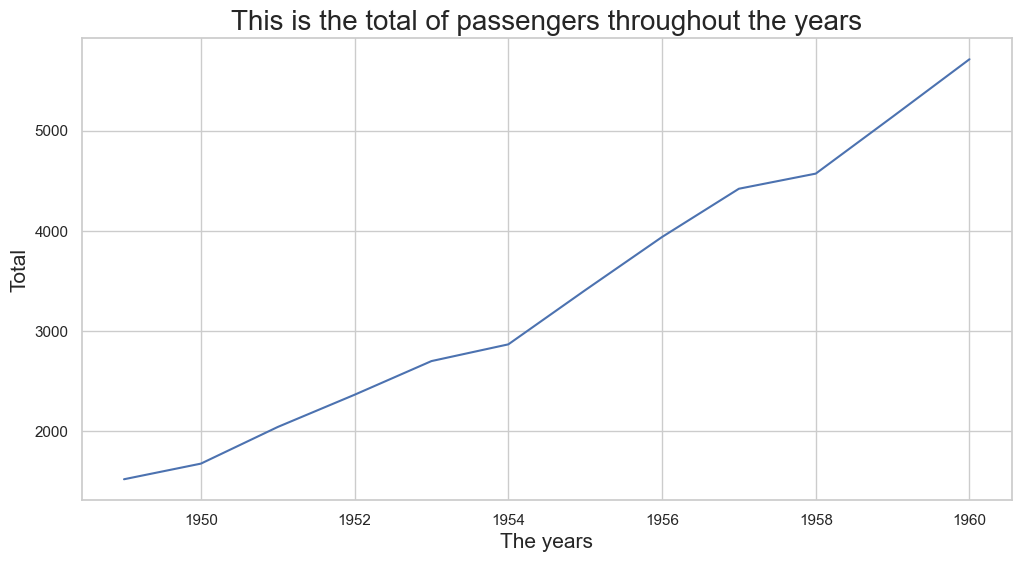

In [59]:
sns.lineplot(data=flights, x="year", y="passengers", errorbar=None, estimator=sum); #unless 

plt.ylabel("Total", fontsize=15);
plt.xlabel("The years", fontsize=15);
plt.title("This is the total of passengers throughout the years", fontsize = 20);
plt.show();

`Evolución del total de pasajeros por año desglosado por mes❓`

In [60]:
# hue: it'l assign a color to each level of a categorical variable: dif color -> dif month

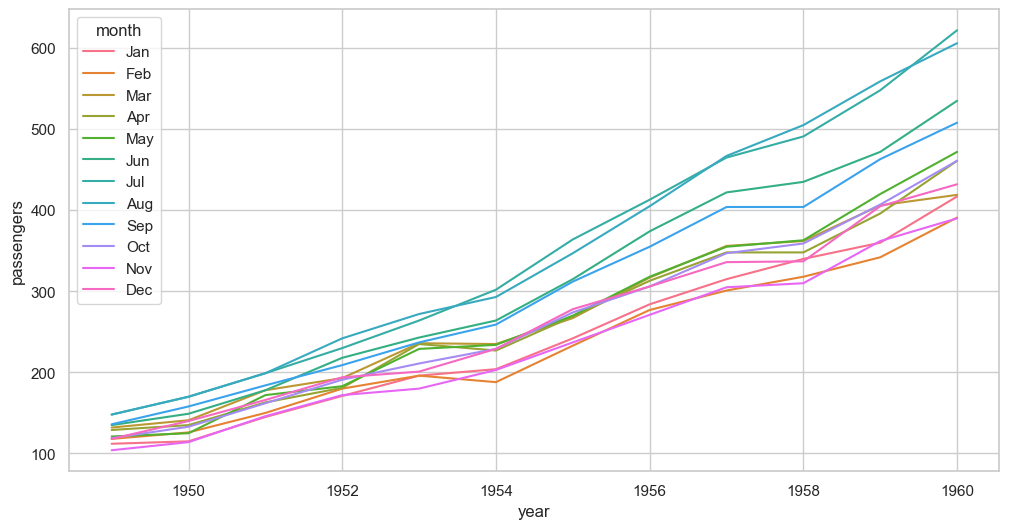

In [61]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month");
plt.show();

### Diagrama de dispersión

`¿Cómo se relacionan estas dos variables cuantitativas (masa corporal y longitud de la aleta)?`

Un diagrama de dispersión utiliza puntos para representar los valores de dos variables numéricas diferentes. La posición de cada punto en los ejes horizontal y vertical indica los valores de un punto de datos individual. Los diagramas de dispersión se utilizan para observar las relaciones entre variables.

#### seaborn: diagrama de dispersión

In [62]:
penguins['flipper_length_mm'].value_counts().values[:4]

array([22, 17, 16, 15])

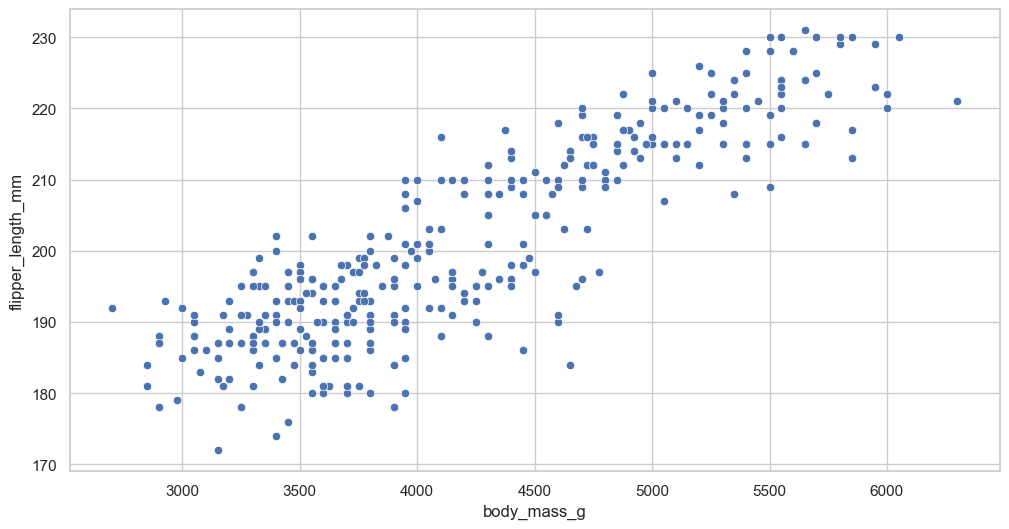

In [63]:
sns.scatterplot(y=penguins["flipper_length_mm"], x=penguins.body_mass_g)
plt.show(); # two qtve vars

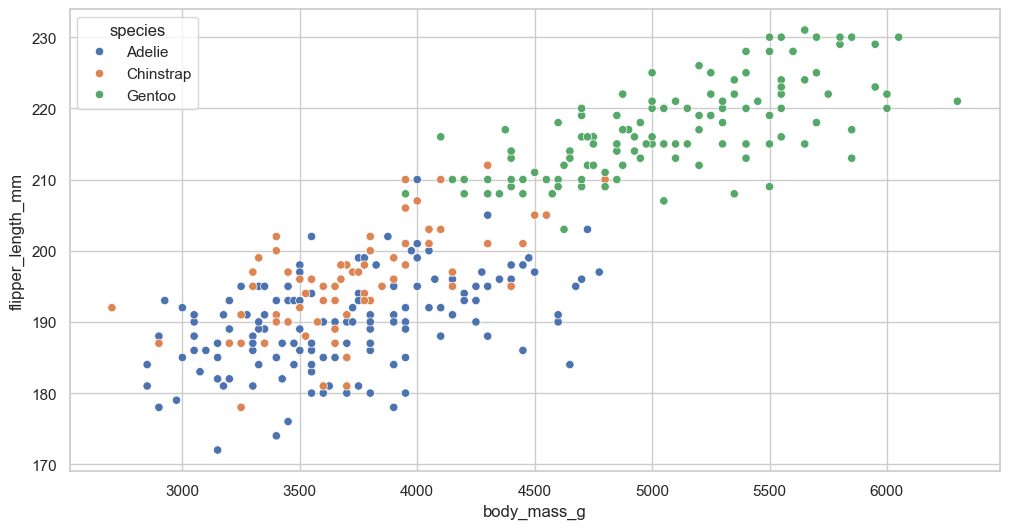

In [64]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue ="species", data=penguins)
plt.show(); # two qtve vars

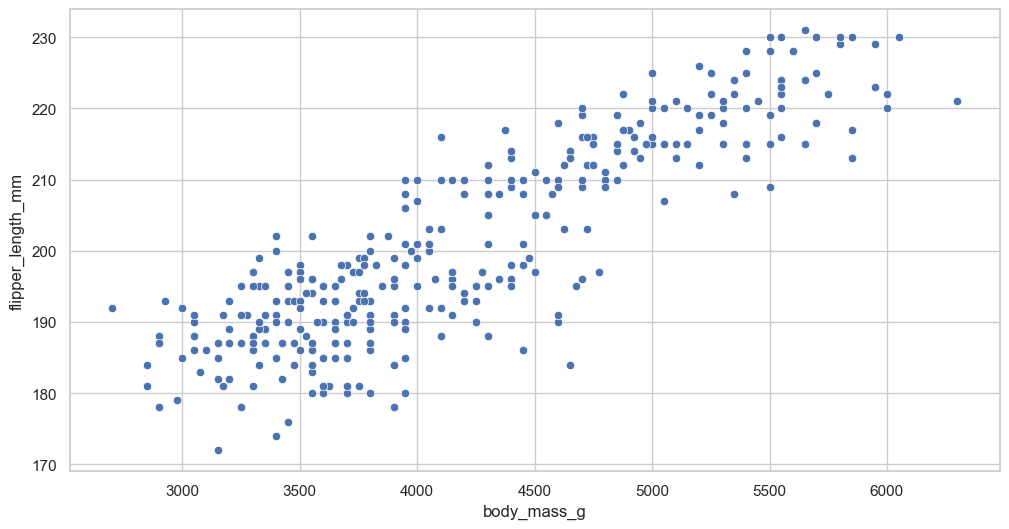

In [65]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=penguins)
plt.show(); # two qtve vars

`¿Cómo se relacionan estas variables cuantitativas (masa corporal y longitud de la aleta) con esta categoría (especie)?`

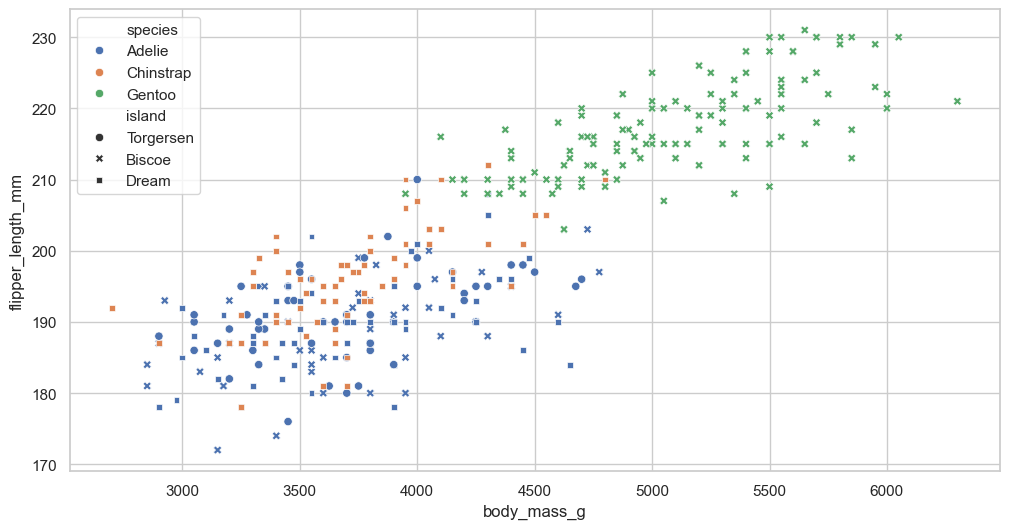

In [66]:
sns.scatterplot(x="body_mass_g", 
                y="flipper_length_mm", 
                hue="species",
                data=penguins, 
                #size='bill_length_mm',
                sizes = (0, 300), style="island")
plt.show();

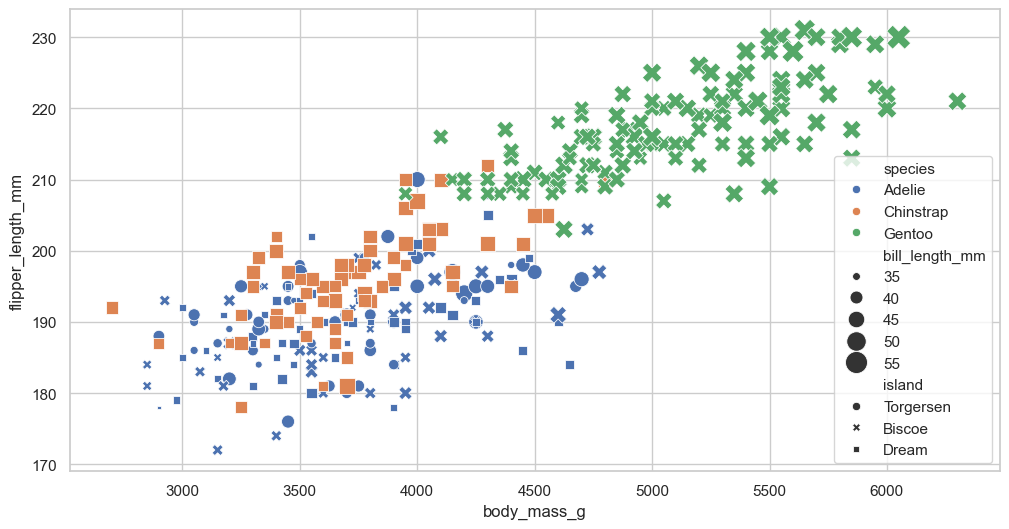

In [67]:
sns.scatterplot(x="body_mass_g", 
                y="flipper_length_mm", 
                hue="species",data=penguins, 
                size='bill_length_mm',
                sizes = (0, 300), 
                style="island")
plt.show();

# 5 dimensions / variables at once:  2 categorical + 3 qtve

Podemos hacer que el tamaño de los puntos dependa de una variable numérica.

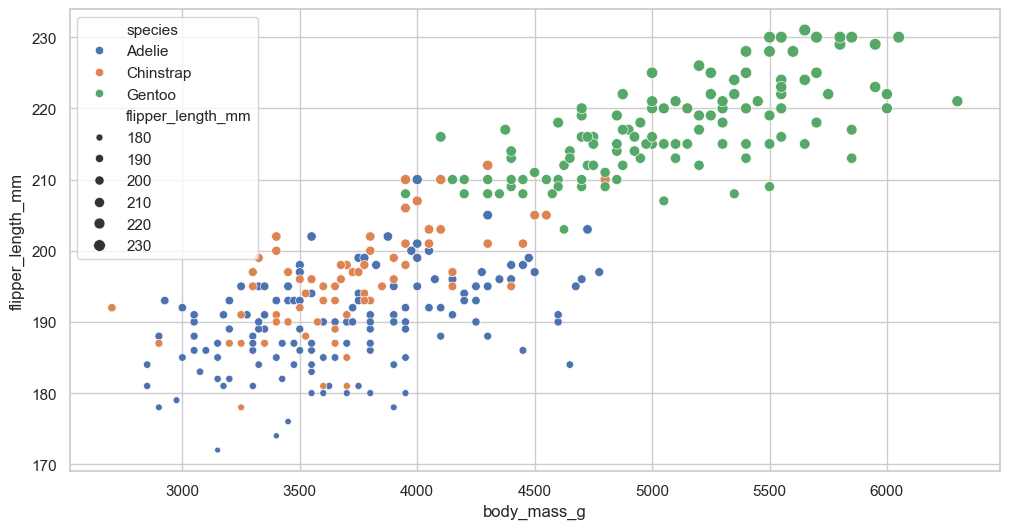

In [68]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species",data=penguins, size="flipper_length_mm")
plt.show();

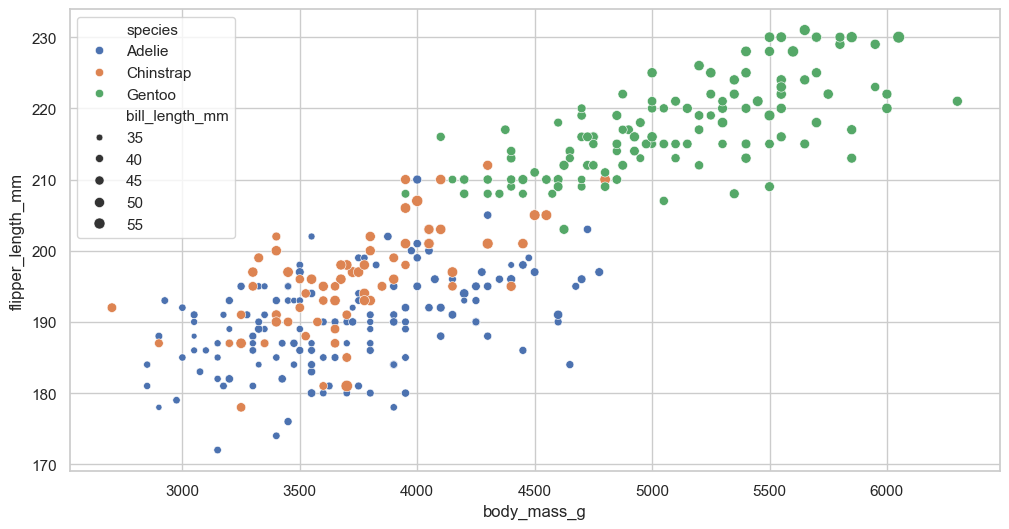

In [69]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species",data=penguins, size="bill_length_mm")
plt.show();

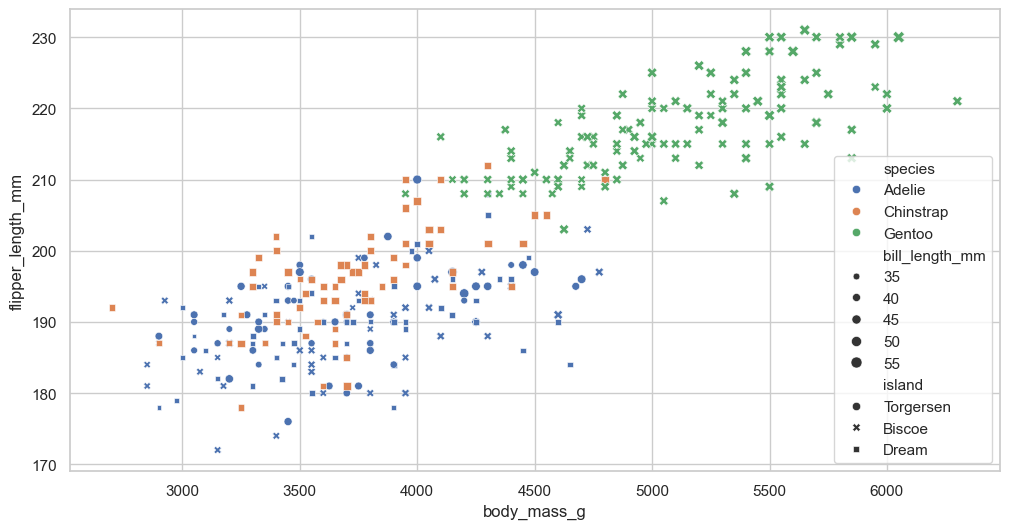

In [70]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species",data=penguins, size="bill_length_mm", style="island")
plt.show();

#### Matplotlib: diagrama de dispersión

`¿Cómo se relacionan estas dos variables cuantitativas (masa corporal y longitud de la aleta)?`

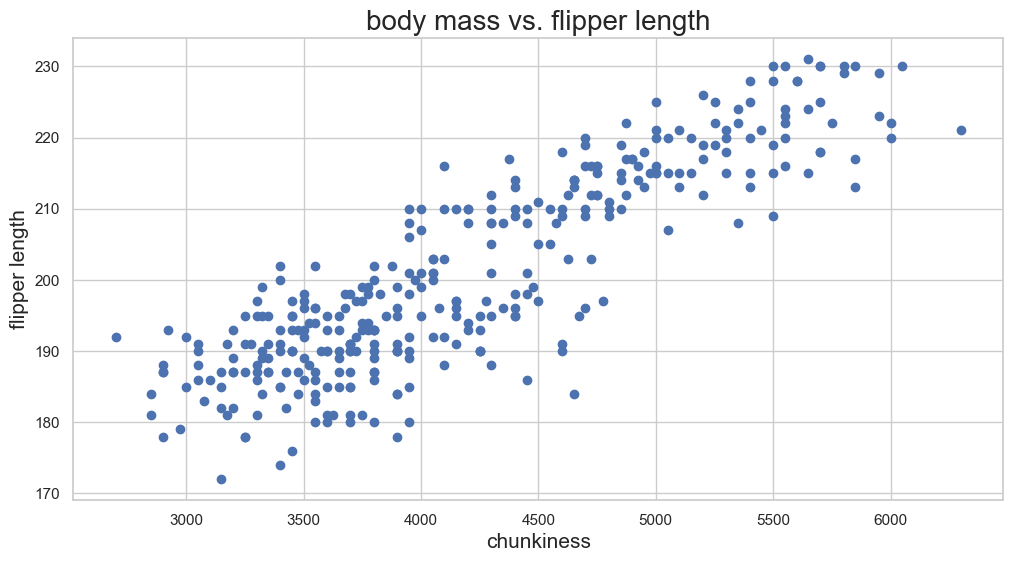

In [71]:
plt.scatter(x=penguins["body_mass_g"], y=penguins["flipper_length_mm"])

plt.xlabel("chunkiness", fontsize=15);
plt.ylabel("flipper length", fontsize=15);
plt.title("body mass vs. flipper length", fontsize = 20);
plt.show();

- **COMPARACIÓN**
- Gráfico de barras
- Gráfico de barras agrupadas
- Gráfico de líneas
- Diagrama de dispersión

## DISTRIBUCIÓN

- Histogramas
- Diagrama de caja
- KDE

### Histogramas
Los histogramas se parecen a los gráficos de barras verticales. Sin embargo, los histogramas representan la frecuencia subyacente de un conjunto de datos discretos o continuos que se mide en una escala de intervalo. Esta representación facilita la visualización de la distribución subyacente del conjunto de datos y la inspección de otras propiedades, como la asimetría y la curtosis (una medida que determina qué tan concentrados están los valores en la región central de la distribución).

![asimetría](https://d2mk45aasx86xg.cloudfront.net/image1_11zon_4542aedc45.webp)

#### seaborn: histogramas

`¿Cómo se distribuye la edad❓`

In [72]:
titanic = pd.read_csv('datasets/titanic.csv')

In [73]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [74]:
titanic.sample(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
426,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
446,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S
498,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
584,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C


In [75]:
# Get two averages

In [76]:
sns.histplot(x=titanic.Age);


# Average age: 20-30s
# More kids than granpas
# More younger people than older people
# almost twice 20ers as 40ers

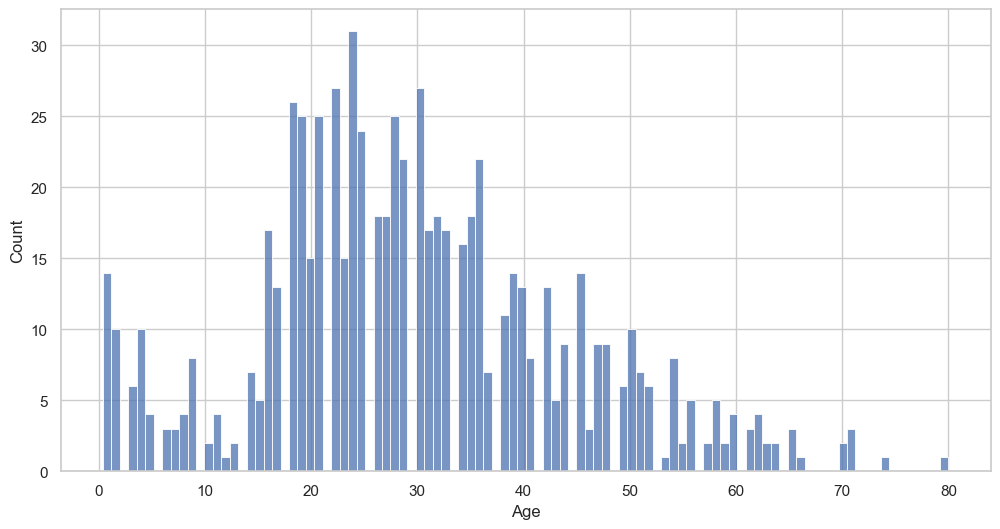

In [99]:
sns.histplot(x=titanic.Age, bins=100)
plt.show();# do we want this much detail?

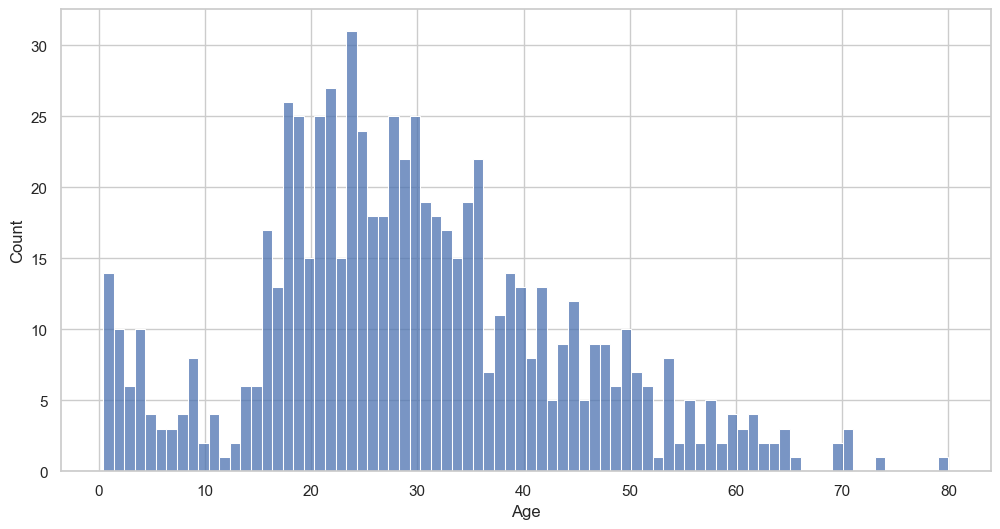

In [100]:
sns.histplot(x=titanic.Age, binwidth=1)
plt.show();# do we want this much detail?

In [79]:
titanic.Age.min()

np.float64(0.42)

In [80]:
titanic.shape

(891, 11)

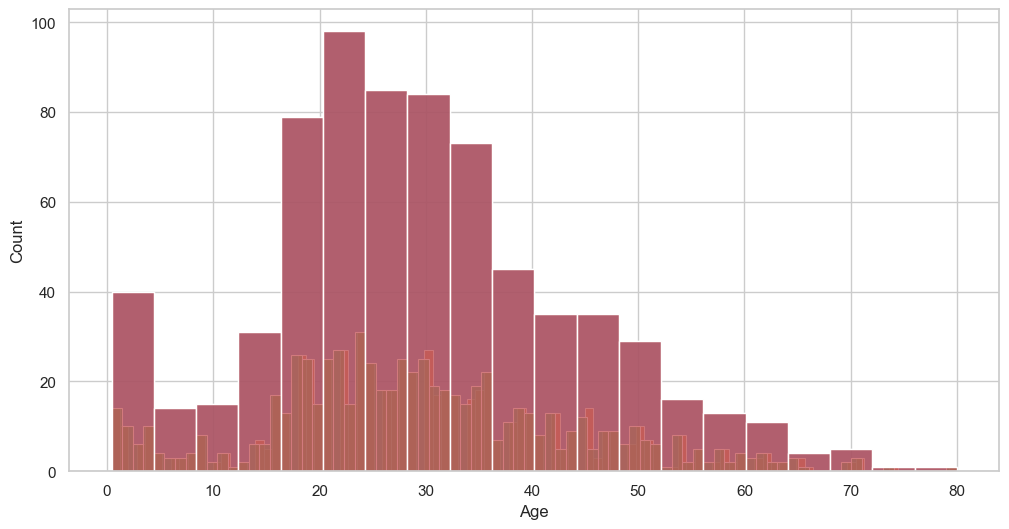

In [81]:
sns.histplot(x=titanic.Age)
plt.show();

Podemos especificar manualmente el número de "cajas".

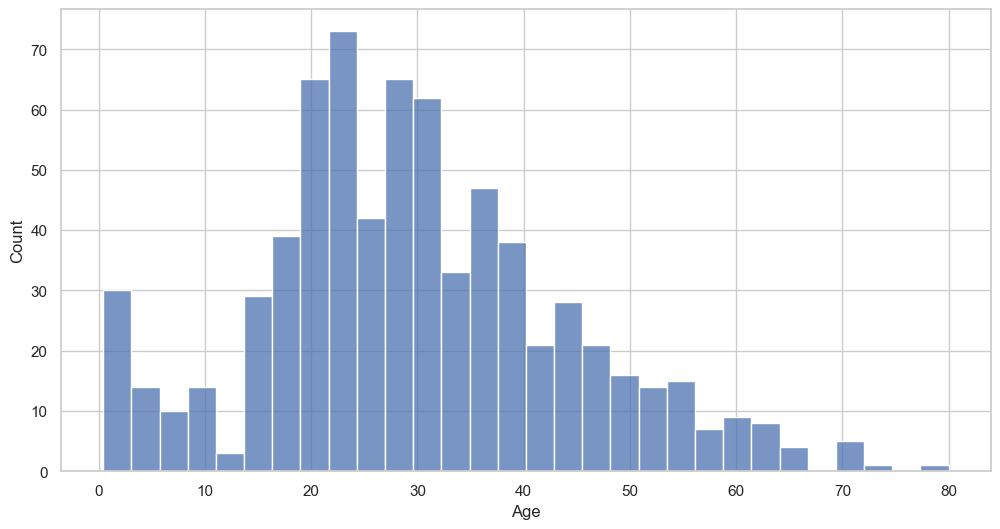

In [82]:
sns.histplot(x=titanic.Age, bins=30)
plt.show();

Podremos elegir si lo rellenamos o no...

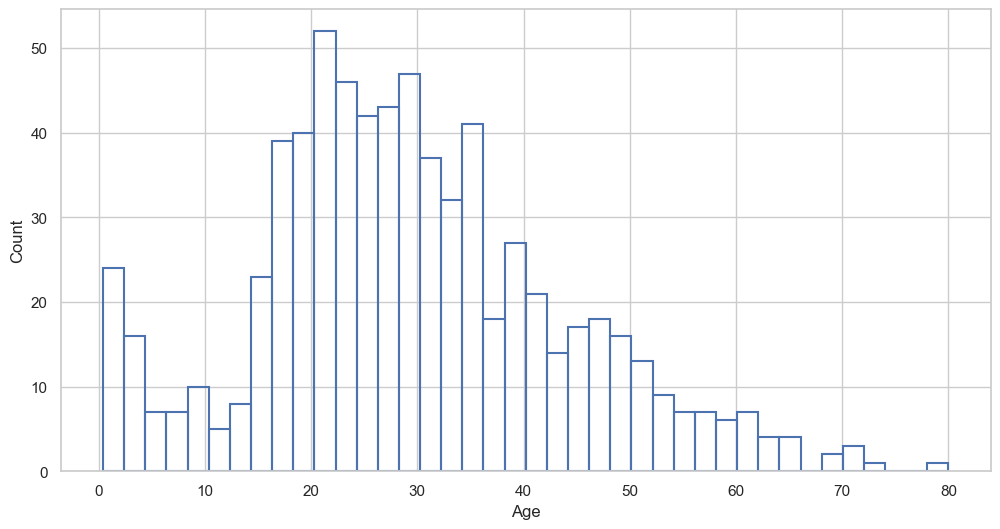

In [83]:
sns.histplot(x=titanic.Age, bins=40, fill=None)
plt.show();

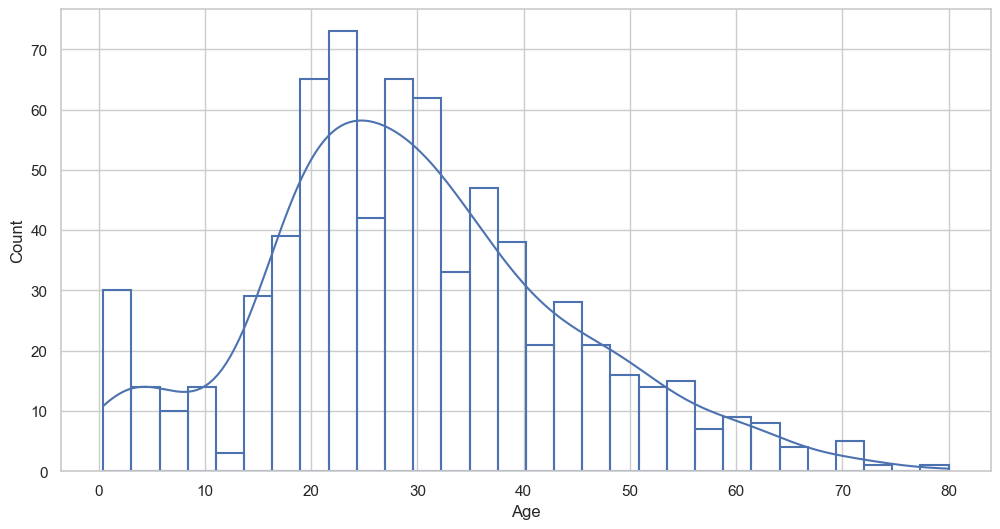

In [84]:
sns.histplot(x=titanic.Age, bins=30, fill=None, kde=True)
plt.show();

# kde = kernel density estimation -> probability

Podemos solicitar una aproximación de la estimación de la distribución/densidad del kernel.

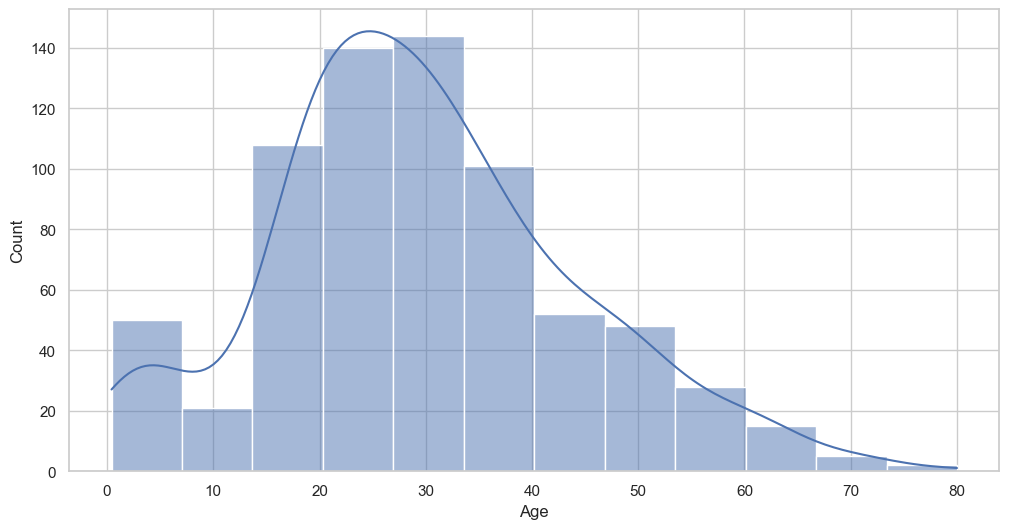

In [85]:
sns.histplot(x=titanic.Age, bins=12, kde=True)
plt.show();

#### Matplotlib: histogramas

`¿Cómo se distribuye la edad❓`

https://htmlcolorcodes.com

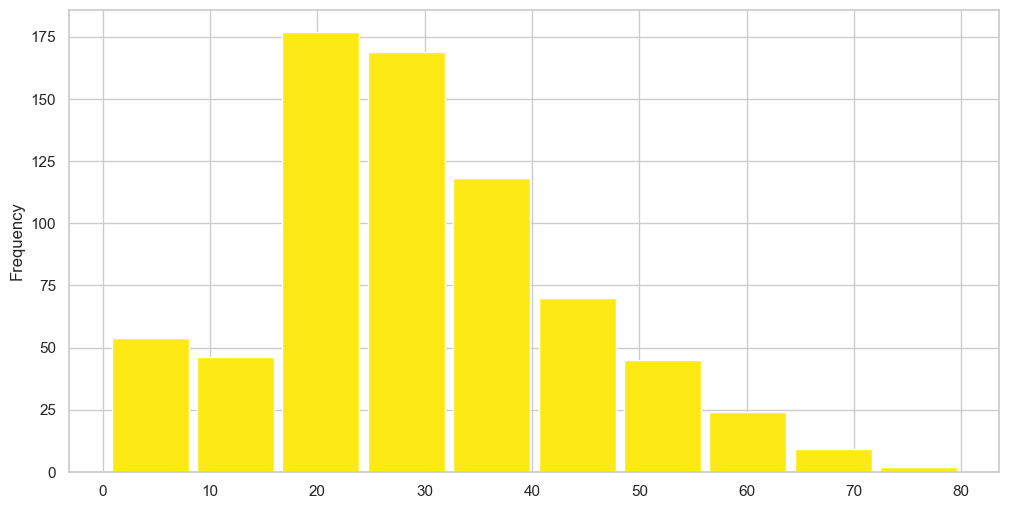

In [86]:
titanic.Age.plot.hist(bins=10,rwidth=0.90, color="#fdea14")
plt.show();

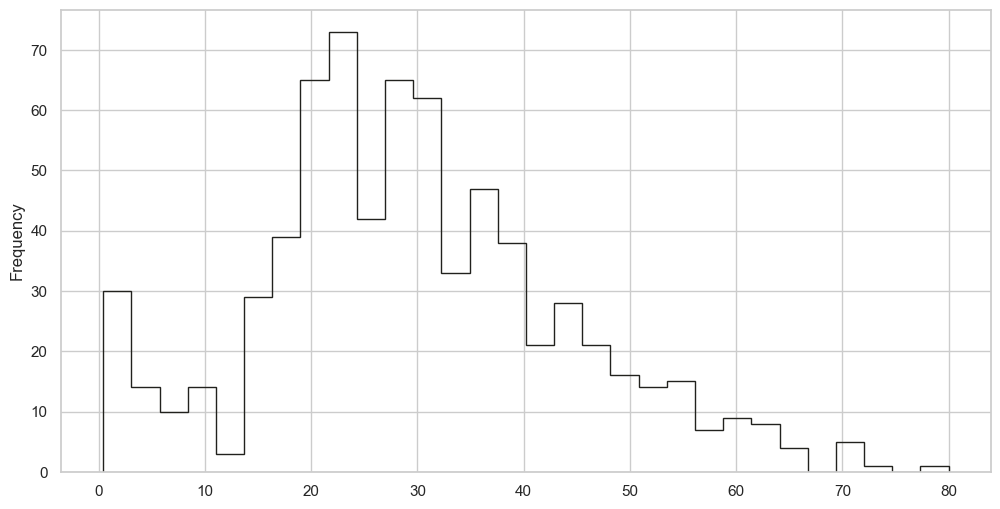

In [87]:
titanic.Age.plot.hist(bins=30, color="#21211d",rwidth=0.90, histtype="step")
plt.show();

### Con variables categóricas

`¿Cómo se distribuye la masa corporal entre las especies?`

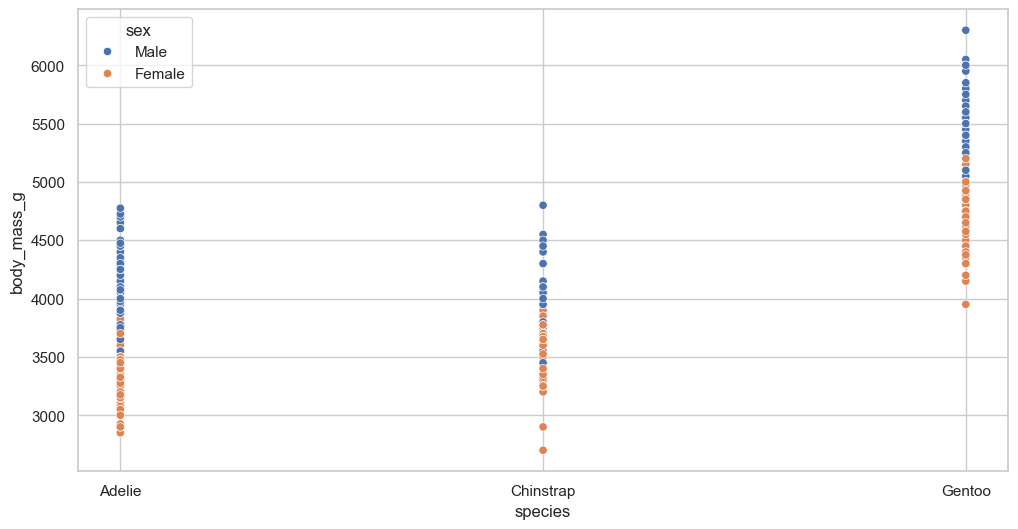

In [88]:
sns.scatterplot(data=penguins, x="species", y="body_mass_g", hue="sex")
plt.show();

La representación predeterminada de los datos en catplot() utiliza un diagrama de dispersión. En realidad, existen dos diagramas de dispersión categóricos diferentes en seaborn. Adoptan enfoques diferentes para resolver el principal desafío de representar datos categóricos con un diagrama de dispersión, que es que todos los puntos que pertenecen a una categoría caen en la misma posición a lo largo del eje correspondiente a la variable categórica.

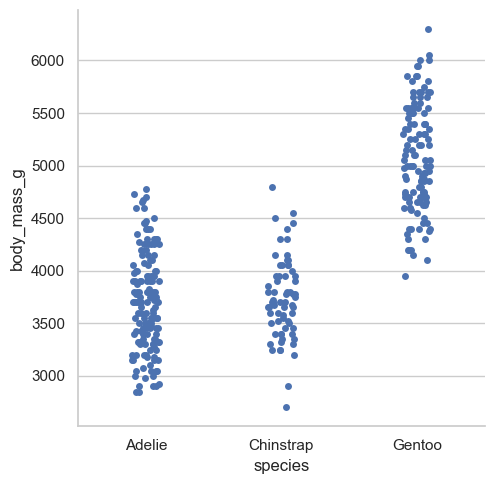

In [89]:
sns.catplot(data=penguins, x="species", y="body_mass_g")
plt.show();

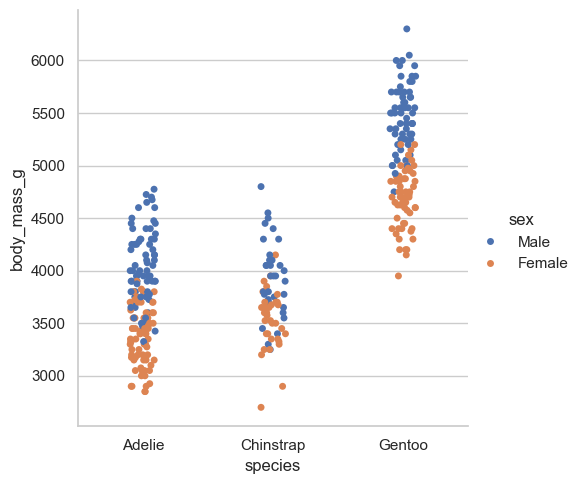

In [90]:
sns.catplot(data=penguins, x="species", y="body_mass_g",hue="sex", jitter=True)
plt.show();

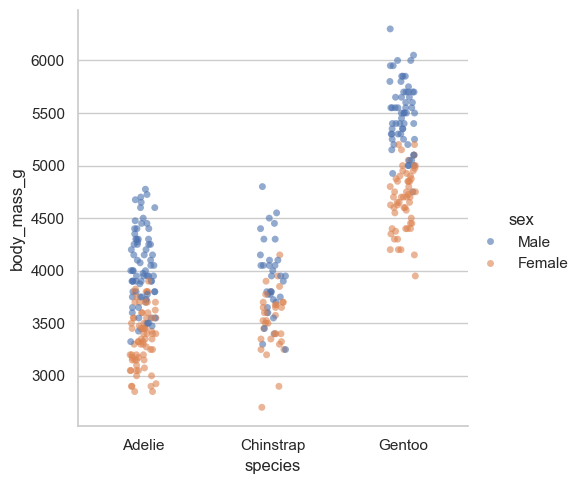

In [91]:
sns.catplot(data=penguins, x="species", y="body_mass_g",hue="sex", alpha=0.6)
plt.show();

### swarmplot
Dibuja un diagrama de dispersión categórico con puntos no superpuestos.

`¿Cómo se distribuye la masa corporal entre especies y entre machos y hembras?`

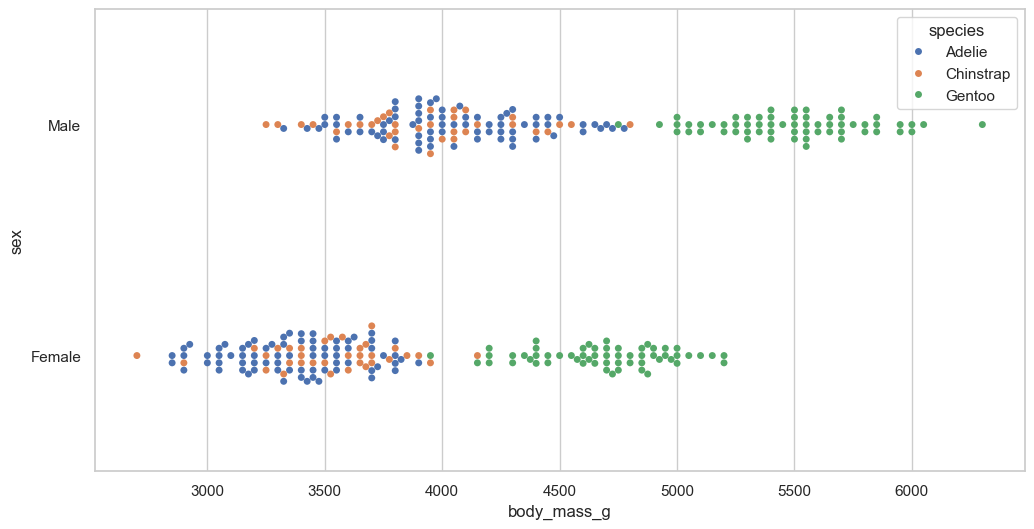

In [92]:
sns.swarmplot(data=penguins, x="body_mass_g", y="sex", hue="species")
plt.show();

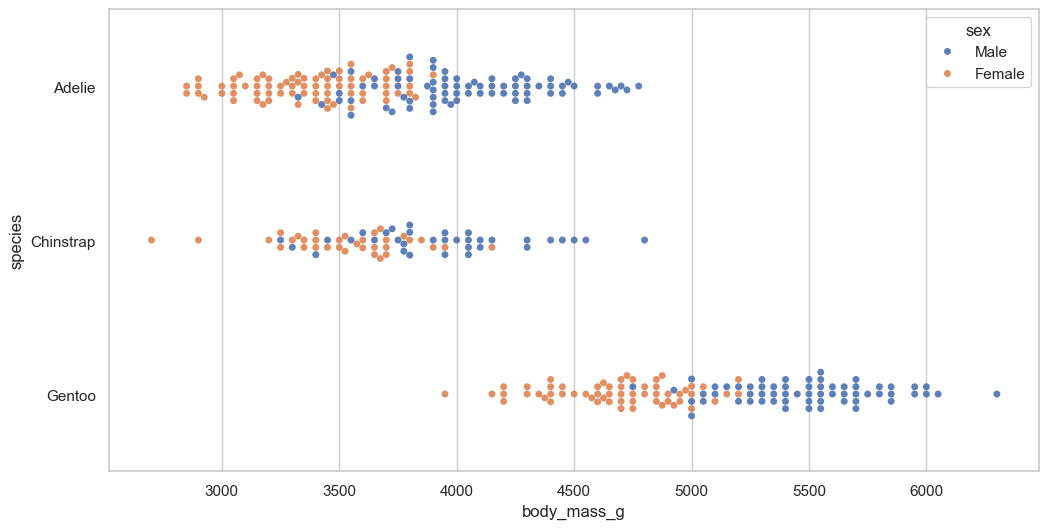

In [93]:
sns.swarmplot(data=penguins, x="body_mass_g", y="species", hue="sex", alpha = 0.9)
plt.show();

### Diagrama de caja

Este tipo de gráfico muestra los valores de los tres cuartiles de la distribución junto con los valores extremos. Las líneas se extienden hasta los puntos que se encuentran dentro de 1,5 RI del cuartil inferior y superior, y luego las observaciones que quedan fuera de este rango se muestran de forma independiente. Esto significa que cada valor del diagrama de caja corresponde a una observación real en los datos.

Las líneas:
- La del medio: la mediana
- La del medio a la izquierda: Q1: percentil 25%
- Media a la derecha: Q3: percentil 75%

- Izquierda: Q1 - 1,5 IQR
- Derecha: Q3 + 1,5 IQR

+ Primer cuartil: El 25% de los valores son menores o iguales a este valor (punto 2 en el gráfico anterior).
+ Mediana o Segundo Cuartil: Divide la distribución en dos partes iguales, de forma que el 50% de los valores son menores o iguales a este valor (punto 3 en el gráfico siguiente).
+ Tercer cuartil: El 75% de los valores son menores o iguales a este valor (punto 4 en el gráfico siguiente).
Rango Intercuartil (RIC): Diferencia entre el valor del tercer cuartil y el primer cuartil.

`¿Cómo se distribuye la edad❓`

In [94]:
titanic = pd.read_csv("datasets/titanic.csv")

In [95]:
titanic.Age.median()

np.float64(28.0)

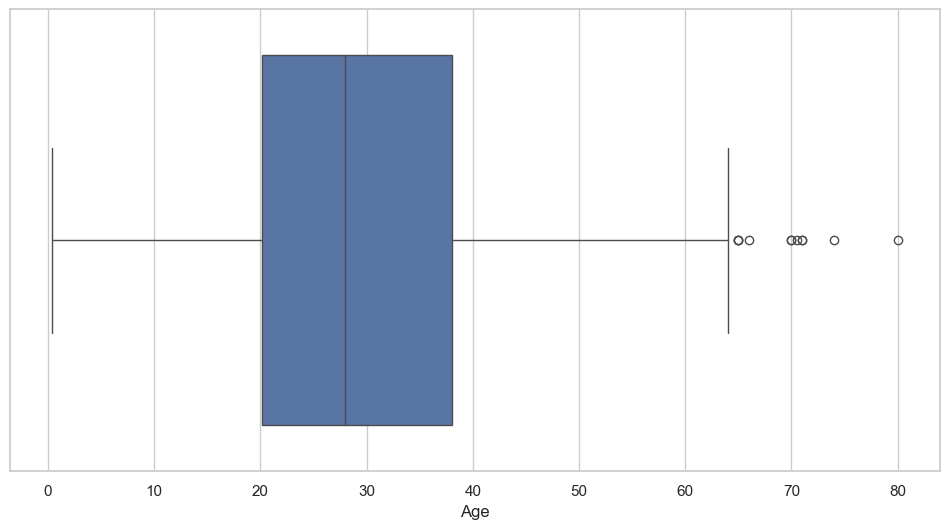

In [96]:
sns.boxplot(x="Age", data=titanic)
plt.show();

In [97]:
titanic.Age.max()

np.float64(80.0)

In [98]:
titanic.Age.quantile(.50)

np.float64(28.0)

In [ ]:
titanic.Age.dropna().quantile(.50)

In [ ]:
titanic.Age.dropna().quantile(.25)

In [ ]:
titanic.Age.dropna().quantile(.75)

In [ ]:
titanic.Age.median() # with NaNs 

In [ ]:
titanic.Age.dropna().median()

`¿Cómo se distribuye la edad entre las clases?`

In [ ]:
sns.boxplot(x="Pclass", y="Age", data=titanic)
plt.show();

### ViolinPlot
Un diagrama de violín es un método para representar datos numéricos. Es similar a un diagrama de caja, con el agregado de un diagrama de densidad de kernel rotado en cada lado.

`¿Cómo se distribuye la edad❓`

In [ ]:
violin = sns.violinplot(x=titanic.Age)
violin.axvline(x=titanic.Age.median(), c="red", label="median")
plt.legend()
plt.show();

``¿Cómo se distribuye la longitud del pico entre las especies?`

In [ ]:
sns.violinplot(x=penguins.bill_length_mm, y=penguins.species)
plt.show();

### Gráfico de KDE
Esta función permite un control mucho mayor sobre el gráfico resultante que la función seaborn.distplot. Si pasamos como primer argumento el conjunto de valores y calculados en la sección anterior, obtenemos exactamente el mismo gráfico.

[Seaborn: kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

`¿Cómo se distribuye la edad❓`

In [ ]:
sns.kdeplot(x=titanic.Age)
plt.show();

#### Con más variables

`¿Cómo es la edad en las distintas clases?`

In [ ]:
sns.kdeplot(x=titanic.Age, hue=titanic.Pclass)
plt.show();

In [ ]:
sns.kdeplot(x=titanic.Age, hue=titanic.Pclass, fill=True)
plt.show();

#### Agregamos KDE al histplot
Las líneas que vamos a agregar son de la librería matplotlib, pero... lo bueno es que podemos combinar ambas librerías

In [ ]:
graf = sns.histplot(x=titanic.Age, kde=True) # Saving the graph as a variable

graf.axvline(x=titanic.Age.mean(), c="red", label="mean")
graf.axvline(x=titanic.Age.median(), c="green", label="median")
graf.axvline(x=titanic.Age.max(), c="blue", label="max") #X axis

graf.axhline(y=60, c="black", label="Horizontal") #Y axis
plt.legend()
plt.show();

In [ ]:
# There's a NaN on the column, but is omitted when doing the mean calculation
print(titanic.Age.isna().sum())
print(titanic.Age.mean())

- **DISTRIBUCIÓN**
- Histogramas
- Diagrama de enjambre
- Diagrama de caja
- Diagrama de violín

## PARTE DE UN TODO

- Gráfico circular
- Gráfico de barras apiladas
- Gráfico de barras con columnas apiladas

### Pie plot 👀
- ⚠️ NO muestra datos cuantitativos de manera muy efectiva.
- ⚠️ Las porciones pequeñas, por ejemplo el 2% del total, corren el riesgo de ser invisibles en el gráfico.
- ⚠️ A las personas les resulta muy difícil comparar áreas y ángulos entre sí, especialmente cuando presentan valores similares.

`¿Cuál es la proporción de especies❓`

In [ ]:
pens = penguins["species"].value_counts()
pens

In [ ]:
pens.plot.pie(autopct="%.1f%%")
plt.show();

### Gráfico de columnas apiladas

#### seaborn: columna apilada (histograma)

`¿Cómo se distribuye la edad de las personas que sobrevivieron/no sobrevivieron❓`

In [ ]:
sns.histplot(data=titanic, x="Age", hue="Survived", multiple="stack")
plt.show();

In [ ]:
sns.histplot(data=titanic, x= "Age", hue="Pclass", multiple="stack");
plt.axvline(titanic.Age.mean());
plt.axvline(titanic.Age.quantile(0.75));
plt.axvline(titanic.Age.quantile(0.25))
plt.show();

`¿Cómo se distribuye la longitud del flippter de los pingüinos entre especies?`

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")
plt.show();

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", alpha = 0.9)
plt.show();

No solo puedo condicionar un histplot (es decir, mostrarme los datos con una condición en el marco de datos), sino que también, en lugar de elegir todas las categorías en el tono, puedo elegir solo las que quiero.

`¿Cómo se distribuye la longitud del flippter > 170 de los pingüinos entre especies?`

In [ ]:
sns.histplot(palette="mako", x=penguins[penguins.flipper_length_mm > 170].flipper_length_mm, hue=penguins["species"])
plt.show();

`¿Cómo se distribuye la longitud del flippter > 170 de los pingüinos de las especies Adelie y Chinstrap?`

In [ ]:
#Multiple conditions when plotting

sns.histplot(palette="mako", 
             x=penguins[penguins.flipper_length_mm > 170].flipper_length_mm, 
             hue=penguins[(penguins.species=="Adelie")|(penguins.species=="Chinstrap")].species)
plt.show();

Puedo filtrar los datos antes, en pandas, porque es más cómodo, y pasarlos filtrados a seaborn

In [ ]:
pens = penguins[((penguins.species=="Chinstrap")| (penguins.species=="Adelie")) & (penguins.flipper_length_mm > 170)]
pens.head()

In [ ]:
sns.histplot(palette="mako", x=pens.flipper_length_mm, hue=pens.species)
plt.show();

Documentación de histogramas --> https://seaborn.pydata.org/generated/seaborn.histplot.html

`¿Cómo puedo comparar tres distribuciones compuestas diferentes a la vez?`

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5,5))
plt.show();

In [ ]:
# Emtpy plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15)) # the grid

# For each plot, plot it somwhere

# 1. Regular 
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", ax=axs[0]) # where you want the plot to be

# 2. Above 170
sns.histplot(palette="mako", x=penguins[penguins.flipper_length_mm > 170].flipper_length_mm, hue=penguins["species"],multiple="stack", ax=axs[1]);

# 3. Above 170 & only two species
sns.histplot(palette="mako", x=pens.flipper_length_mm, hue=pens.species, ax=axs[2])
plt.show();

`¿Cómo es la distribución de la edad entre clases?: apilada y de lado a lado`

In [ ]:
sns.histplot(data=titanic, x="Age", hue="Pclass", multiple="layer", bins=10)
plt.show();

In [ ]:
sns.histplot(data=titanic, x="Age", hue="Pclass", multiple="dodge", bins=10)
plt.show();

- **PARTE DE UN TODO**
- Gráfico circular
- Gráfico de columnas apiladas

## RELACIONES

- Diagrama de dispersión
- Gráfico de líneas
- Mapa de calor

### Diagrama de dispersión

`¿Cómo se relacionan estas variables cuantitativas (masa corporal y longitud de la aleta)?`

In [ ]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species",data=penguins)
plt.show();

### Gráfico de líneas

`¿Cómo están cambiando estas variables cuantitativas a lo largo del tiempo?`

In [ ]:
df = pd.DataFrame({'year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                   'A': [10, 12, 14, 15, 15, 14, 13, 18],
                   'B': [18, 18, 19, 14, 14, 11, 20, 28],
                   'C': [5, 7, 7, 9, 12, 9, 9, 4],
                   'D': [11, 8, 10, 6, 6, 5, 9, 12]})
df

[Los pandas se derriten](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

In [ ]:
data = pd.melt(df, ['year'])
data.head()

In [129]:
data = pd.melt(df, ['year'])

In [ ]:
sns.lineplot(x='year', y="value", hue='variable', 
             data=data,
             palette=['red', 'blue', 'purple', 'pink'])
plt.show();

### Matriz de correlación
La matriz de correlación es una métrica importante de análisis de datos que se calcula para resumir los datos con el fin de comprender la relación entre las distintas variables y tomar decisiones en consecuencia.

«¿En qué medida están relacionadas estas variables cuantitativas?»

In [ ]:
corr = titanic.select_dtypes(include='number').corr()
corr

[documento de np triu](https://numpy.org/doc/stable/reference/generated/numpy.triu.html) 
[documento de np ones_like](https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html)

In [ ]:
sns.heatmap(corr)
plt.show();

Mapa de calor del Titanic

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(corr,  
            mask = mask,
            cmap=color_map,
            square=True,
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
)
plt.show();

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
)
plt.show();

### Diagrama de pares
Gráficamos las relaciones entre las variables

`¿Cómo se comparan todas estas variables?`

In [ ]:
sns.pairplot(penguins)
plt.show();

`¿Cómo se comparan todas estas variables entre especies?`

In [ ]:
sns.pairplot(penguins, hue="species")
plt.show();

- **RELACIONES**
- Diagrama de dispersión
- Gráfico de líneas
- Mapas de calor
- Diagrama de pares

## TENDENCIAS

### Gráfico de líneas

`¿Cómo están cambiando todos estos grupos a lo largo del tiempo?`

In [ ]:
df = pd.DataFrame({'years': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                   'Data': [20, 12, 15, 14, 19, 23, 25, 29],
                   'UX': [5, 7, 7, 9, 12, 9, 9, 4],
                   'Web dev': [1, 1, 10, 6, 6, 5, 9, 12]})
df

In [ ]:
data = pd.melt(df, ['years'])
sns.lineplot(x='years', y="value", hue='variable', 
             data=data,
             palette=['red', 'blue', 'purple'])
plt.show();

### Gráfico de áreas

``¿Cómo está cambiando la población a lo largo del tiempo y en qué se diferencia en estas ciudades?`

In [ ]:
df = pd.DataFrame({'years': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                   'Barcelona': [20000, 12000, 15000, 14000, 19000, 23000, 25000, 29000],
                   'Madrid': [5000, 7000, 7000, 9000, 12000, 9000, 9000, 4000],
                   'Valencia': [1000, 8000, 10000, 6000, 6000, 5000, 9000, 12000]})
df

In [ ]:
#define colors to use in chart
color_map = ['red', 'steelblue', 'pink']
    
#create area chart
plt.stackplot(df.years, df.Barcelona, df.Madrid, df.Valencia,
              labels=['Barcelona', 'Madrid', 'Valencia'],
              colors=color_map)

#add legend
plt.legend(loc='upper left')

#add axis labels
plt.xlabel('Years')
plt.ylabel('Population')

#display area chart
plt.show()

### Gráfico de columnas: gráfico de barras agrupadas

`¿En qué se diferencia la masa corporal en distintas islas según si se es hombre o mujer?`

In [ ]:
sns.barplot(data=penguins, x="island", y="body_mass_g", hue="sex")
plt.show();

-------------------------------------------------- --------------

### Diagrama de articulaciones: histogramas y diagrama de dispersión
Dibuja un gráfico de dos variables con gráficos bivariados y univariados. Es similar a un diagrama de dispersión, pero suma los histogramas individuales de ambas variables

In [ ]:
penguins.head()

In [ ]:
sns.jointplot(data=penguins, x= "bill_depth_mm", y= "flipper_length_mm")
plt.show();

Al asignar una variable `hue` se agregarán colores condicionales al diagrama de dispersión y se dibujarán curvas de densidad separadas (usando kdeplot()) en los ejes marginales.

In [ ]:
sns.jointplot(data=penguins, x= "bill_depth_mm", y= "flipper_length_mm", hue="species")
plt.show();

In [ ]:
sns.jointplot(data=penguins, x= "body_mass_g", y= "flipper_length_mm")
plt.show();

- ¿Puedes hacer un diagrama conjunto con matplotlib?
Sí, pero tienes que configurar las cifras y hacerlo de forma independiente... aquí tienes un [tutorial](https://stackabuse.com/matplotlib-scatter-plot-with-distribution-plots-histograms-jointplot/)

Mapa de calor de los pingüinos

## Subtramas
Se utilizan para pintar varios gráficos en la misma "imagen"

In [ ]:
# We create a figure and axes, where we will later access them in the form of coordinates [row,column]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
plt.show();

In [ ]:
pens.sample()

In [ ]:
pens["sex"]

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

penguins.groupby(["species", "sex"])["sex"].count().unstack().plot(kind="barh", ax=axs[0, 0])
sns.violinplot(x=penguins.bill_length_mm, y=penguins.species, ax=axs[0, 1])
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", ax=axs[0, 2])
sns.swarmplot(data=penguins, x="body_mass_g", y="sex", hue="species", ax=axs[1, 0])
sns.boxplot(data=penguins, x="body_mass_g", y="sex", hue="species", ax=axs[1, 1])
sex_counts = penguins["sex"].value_counts()
axs[1, 2].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axs[1, 2].set_title("Sex Distribution")
plt.tight_layout()
plt.show()

## Guardar gráficos

In [ ]:
scatter = sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=penguins, hue="species");
scatter.figure.savefig("scatter.jpg", dpi=1000)
plt.show();

In [ ]:
graf = sns.histplot(x=titanic.Age, kde=True)
graf.axvline(x=titanic.Age.dropna().mean(), c="red", label="mean")
graf.axvline(x=titanic.Age.dropna().median(), c="green", label="median")
plt.legend()
graf.figure.savefig("graph.png", dpi=1000)
plt.show();